#### Insurance Claims- Fraud Detection
#### Problem Statement:

#### Business case:
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 

In [6]:
# Importing Necessory Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import OrdinalEncoder
from imblearn.over_sampling import SMOTE
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Models:
#(for classification)
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score


#Matrics for evaluation:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_roc_curve,roc_auc_score


In [9]:
# READING THE DATASET
df=pd.read_csv("automobile_insurance_fraud.csv")
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


- The given dataset is about insurance claimers who have claimed thier insurance regarding various things like vehicles, properties, injuries.
- There are 40 columns in this dataset, out of which, depending upon 39 independent variables we need to predict the insurance claim is fake or not. Hence it is a binary type of classification.
- The dataset is good blend of numerical, categorical and nominal data.
- All the features are in different scales.

In [10]:
df.shape

(1000, 40)

- The dataset contains 1000 rows and 40 columns.

In [11]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

- There are 40 columns in the dataset, out of which 39 columns are the features and 1 target column (fraud_reported).

In [12]:
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

- Different columns contain different number of categories or numerics. Column _c39 is not containing any data, Hence we will drop it.

In [13]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

- The dataset is good blend of categorical, numerical and nominal data.

In [14]:
df.isna().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

- As we can see there is no missing values present except from _c39 which is containing only NaN values.

In [15]:
df.isin(['?']).sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

- There are values denoted as '?' which are might be NaN values. Hence, we need to get rid of those.

In [16]:
# before dropping these '?' values we are converting those into NaN values
df = df.replace('?',np.NaN)

In [17]:
df.isin(['?']).sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

- As we can see there is no value as '?' as we have converted those into NaN values.

In [18]:
df.isna().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                  178
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

- Now we can see, there are missing values in collision_type, property_damage, police_report_available, _c39 columns.

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

- The dataset is mixture of integer type of data, object type of data and float type of data.
- There are missing values in collision_type, property_damage, police_report_available, _c39 columns.

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
months_as_customer,1000.0,2.039540e+02,1.151132e+02,0.00,115.7500,199.5,276.250,479.00
age,1000.0,3.894800e+01,9.140287e+00,19.00,32.0000,38.0,44.000,64.00
policy_number,1000.0,5.462386e+05,2.570630e+05,100804.00,335980.2500,533135.0,759099.750,999435.00
policy_deductable,1000.0,1.136000e+03,6.118647e+02,500.00,500.0000,1000.0,2000.000,2000.00
policy_annual_premium,1000.0,1.256406e+03,2.441674e+02,433.33,1089.6075,1257.2,1415.695,2047.59
umbrella_limit,1000.0,1.101000e+06,2.297407e+06,-1000000.00,0.0000,0.0,0.000,10000000.00
insured_zip,1000.0,5.012145e+05,7.170161e+04,430104.00,448404.5000,466445.5,603251.000,620962.00
capital-gains,1000.0,2.512610e+04,2.787219e+04,0.00,0.0000,0.0,51025.000,100500.00
capital-loss,1000.0,-2.679370e+04,2.810410e+04,-111100.00,-51500.0000,-23250.0,0.000,0.00
incident_hour_of_the_day,1000.0,1.164400e+01,6.951373e+00,0.00,6.0000,12.0,17.000,23.00


- There is no missing value present in numerical data.
- Minimum age is 19 and maximum age is 64.
- Policy number is the unique id that we will drop as it is not required.
- policy_deductable is a discrete data.
- Minimum annual premium is 433.33 and maximum annual premium is 2047.59
- Minimum Umbrella limit is showing negative numbers, we need to analyze that once again.
- number_of_vehicles_involved, bodily_injuries, witnesses features are containing discrete data.
- _c39 is a column with all missing values that we will get rid of.


#### Data Analysis:

We will do Univariate Analysis to understand the distribution of continuous features and count of the categorical features. Then we will do Bivariate Analysis to understand relation between feature vs target and feature vs feature. After that we will do multivariate Analysis to check multicolinearity and correlation.

Let's do that:

#### Univariate Analysis:

before analysis we will take all the continuous and numerical data into list.


In [212]:
df_con_features=df[['months_as_customer','age','policy_annual_premium','capital-gains','capital-loss',
                    'incident_hour_of_the_day','total_claim_amount','injury_claim',
                    'property_claim','vehicle_claim']]

#### Visualization:

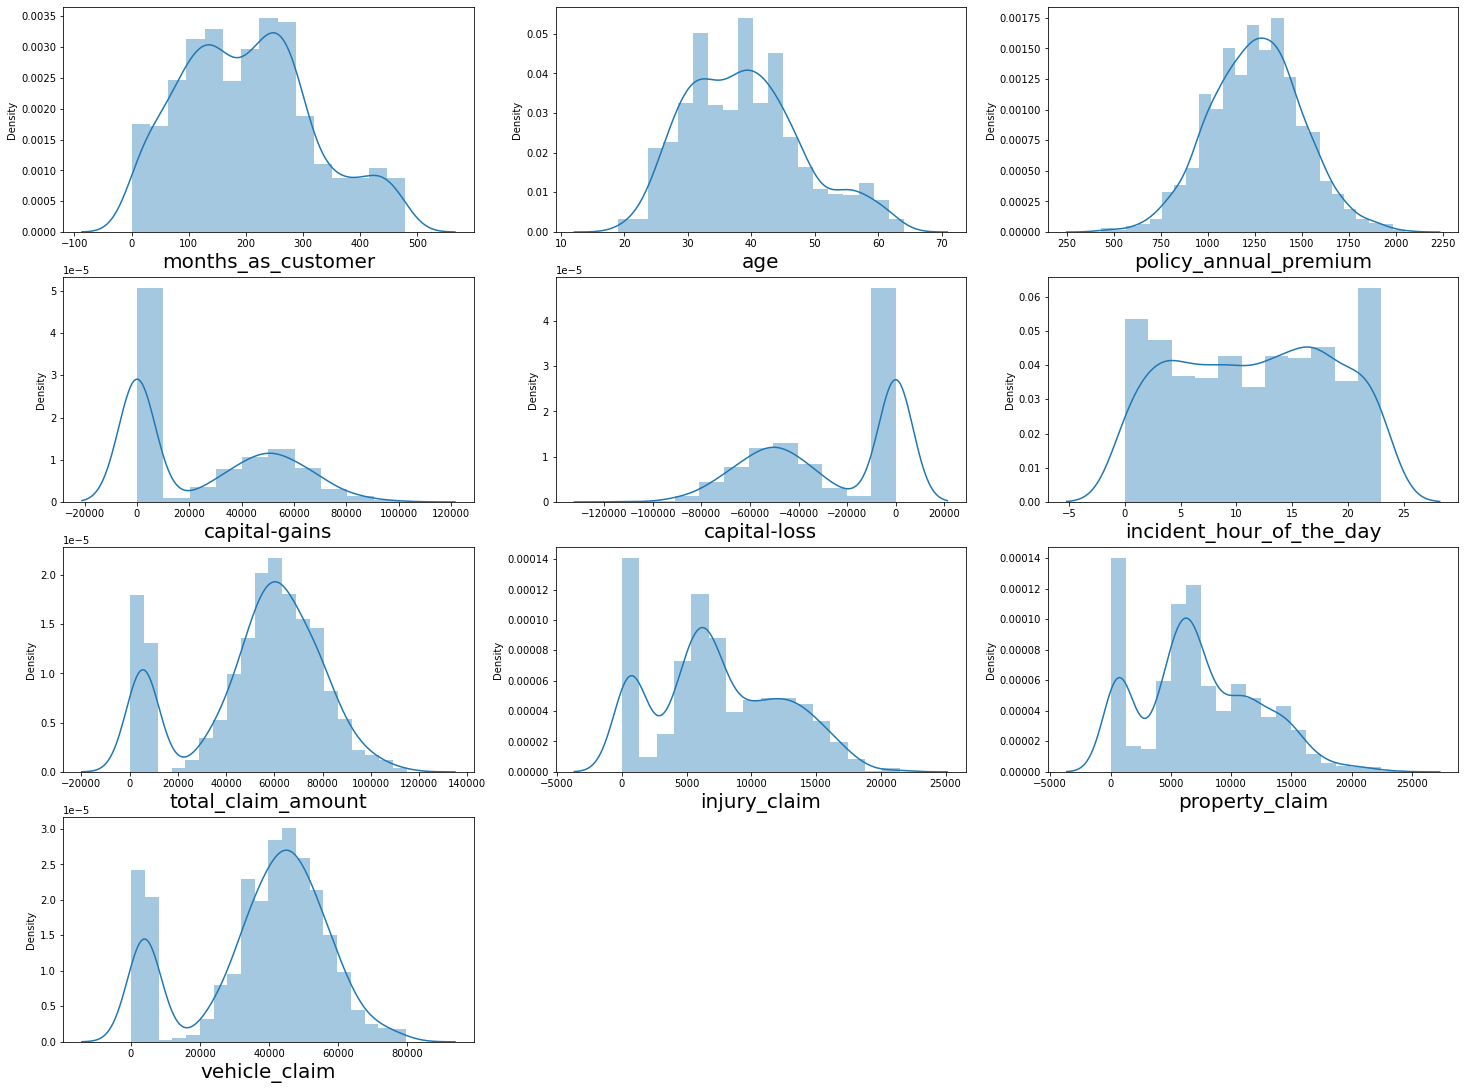

In [213]:
plt.figure(figsize=(25,24),facecolor='white')
plotnumber=1
for column in df_con_features:
    if plotnumber<=15:
        ax=plt.subplot(5,3,plotnumber)
        sns.distplot(df_con_features[column],kde=True)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show() 

- Capital gain, Capital loss, total claim amount, injury claim, property claim, vehicle claim features are having some skewness.


Now let's check the Target variable also:

N    753
Y    247
Name: fraud_reported, dtype: int64

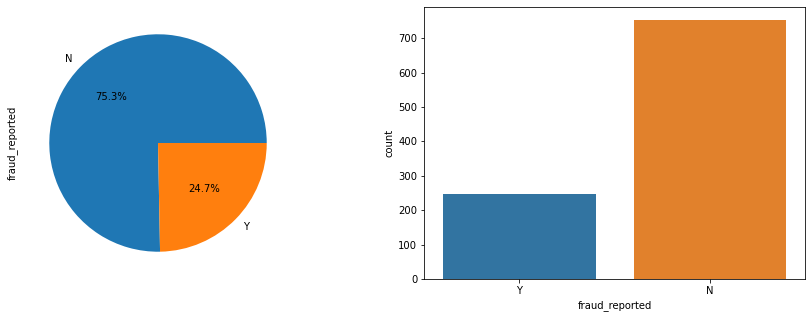

In [214]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['fraud_reported'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['fraud_reported'])
df['fraud_reported'].value_counts()

- The target (fraud_reported) is a categirical data, having 2 categories. One is fraud report is true (Y) and other is fraud report is false (N).
- False fraud report has more count of data 753 (75.3%) and True fraud report has less counts 247 (24.7%).


- Now let's analyze the categorical features as well.

OH    352
IL    338
IN    310
Name: policy_state, dtype: int64

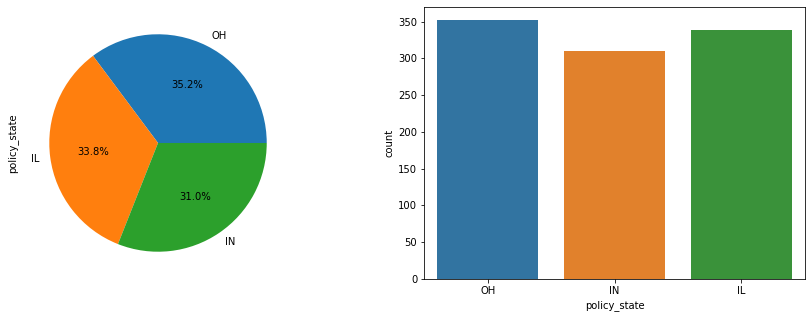

In [216]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['policy_state'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['policy_state'])
df['policy_state'].value_counts()

- policy_state feature has 3 categories, OH counts highest 352 (35.2%), IL counts 338 (33.8%) and IN counts 310 (31.0%)

250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64

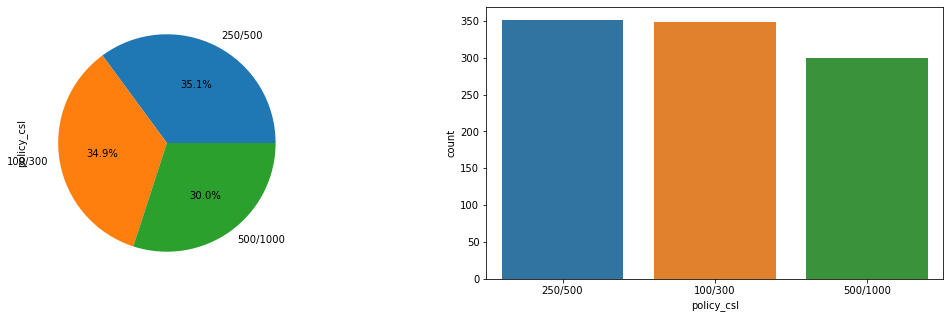

In [217]:
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
df['policy_csl'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['policy_csl'])
df['policy_csl'].value_counts()

- Combined single limit (CSL) is a single number for predetermined coverage of total Bodily Injury,Property Damage per accident. So we can see , there are 3 categories of csl number 100/300,250/500 and 500/1000 out of which 250/500 has the highest count of 351 (35.1%).

1000    351
500     342
2000    307
Name: policy_deductable, dtype: int64

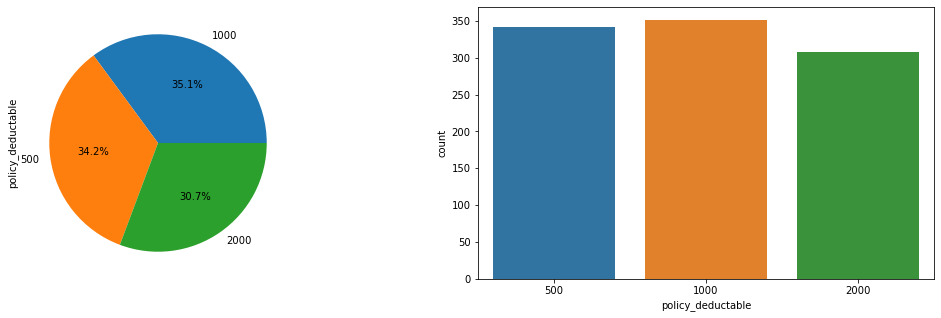

In [26]:
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
df['policy_deductable'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['policy_deductable'])
df['policy_deductable'].value_counts()

- policy_deductable(the amount the customer pay before the insurance company begins paying up) feature has 3 categories. 500,1000 and 2000. Out of which category 1000 has the highest count 351 (35.1%).

 0           798
 6000000      57
 5000000      46
 4000000      39
 7000000      29
 3000000      12
 8000000       8
 9000000       5
 2000000       3
 10000000      2
-1000000       1
Name: umbrella_limit, dtype: int64

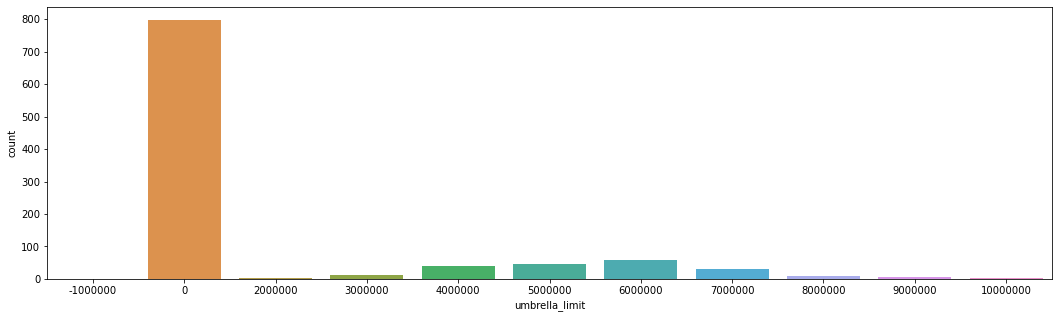

In [28]:
plt.figure(figsize=(18,5))
sns.countplot(df['umbrella_limit'])
df['umbrella_limit'].value_counts()

- Umberella limit has 11 categories out of which category 0 is most common.

FEMALE    537
MALE      463
Name: insured_sex, dtype: int64

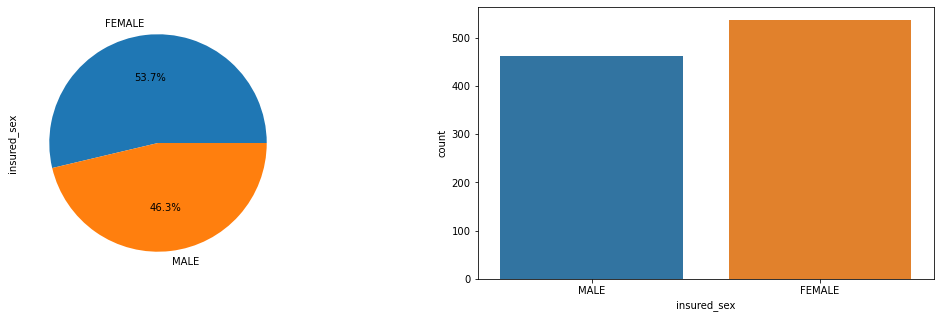

In [29]:
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
df['insured_sex'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['insured_sex'])
df['insured_sex'].value_counts()

- Count of female individuals is more (537) than males (463).

JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64

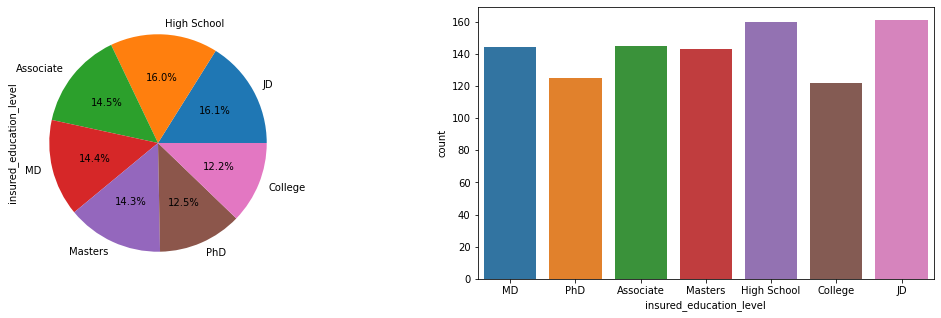

In [30]:
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
df['insured_education_level'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['insured_education_level'])
df['insured_education_level'].value_counts()

- JD counts highest (161) as insured education. And least insured education level is college(122).

machine-op-inspct    93
prof-specialty       85
tech-support         78
exec-managerial      76
sales                76
craft-repair         74
transport-moving     72
priv-house-serv      71
other-service        71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64

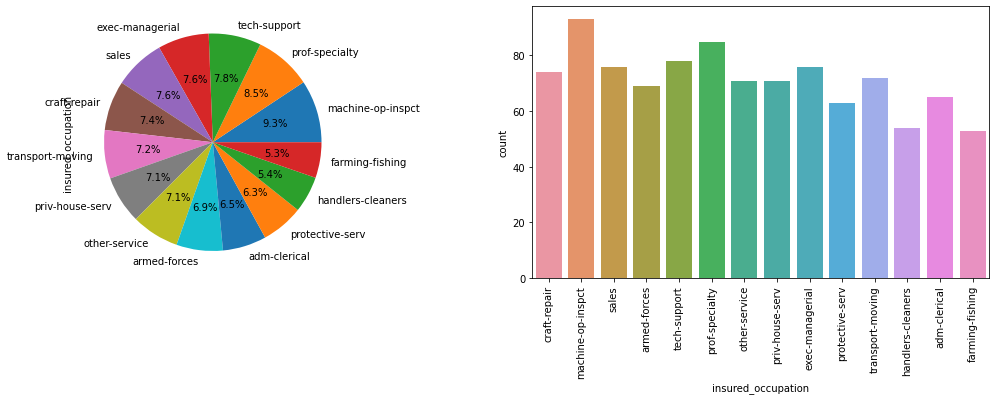

In [32]:
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
df['insured_occupation'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['insured_occupation'])
plt.xticks(rotation=90)
df['insured_occupation'].value_counts()

- machine-op-inspct has got the highest count ( 93 ) of insurance regarding occupation. Least insured occupation is farming-fishing (53).

reading           64
exercise          57
paintball         57
bungie-jumping    56
movies            55
camping           55
golf              55
kayaking          54
yachting          53
hiking            52
video-games       50
skydiving         49
base-jumping      49
board-games       48
polo              47
chess             46
dancing           43
sleeping          41
cross-fit         35
basketball        34
Name: insured_hobbies, dtype: int64

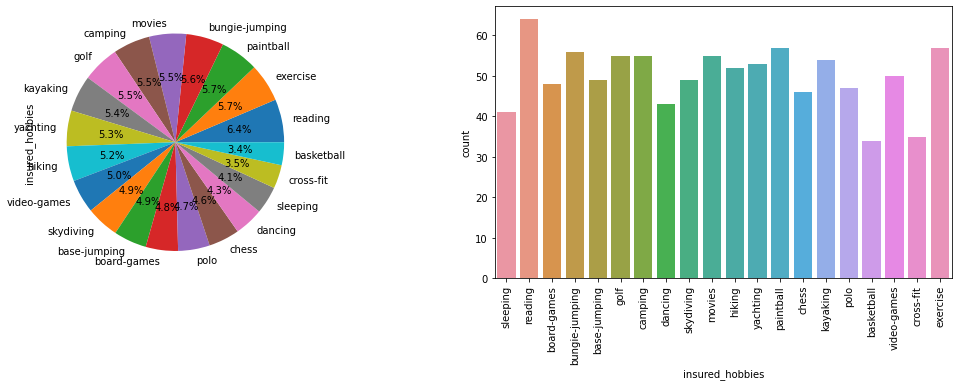

In [34]:
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
df['insured_hobbies'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['insured_hobbies'])
plt.xticks(rotation=90)
df['insured_hobbies'].value_counts()

- reading has got the highest count (64) of insurance as a hobby. And least insured hobby is basketball (34).

own-child         183
other-relative    177
not-in-family     174
husband           170
wife              155
unmarried         141
Name: insured_relationship, dtype: int64

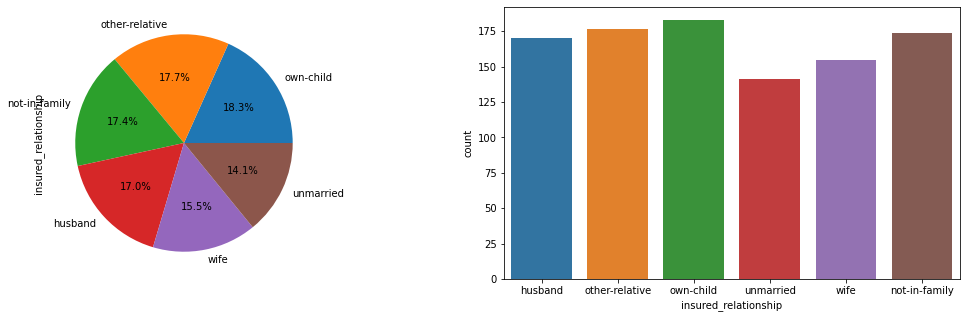

In [35]:
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
df['insured_relationship'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['insured_relationship'])
df['insured_relationship'].value_counts()

- own-child has got highest counts (183) of insurance as insured relationship and least insured relationship is unmarried (141).

Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64

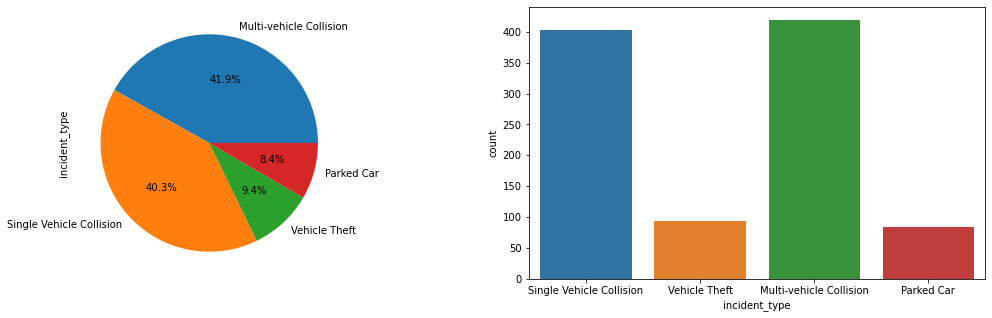

In [36]:
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
df['incident_type'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['incident_type'])
df['incident_type'].value_counts()

- The most occuring incident is Multi-vehicle Collision ( 419 ) and least occuring incident is Parked Car ( 84 ). 

Minor Damage      354
Total Loss        280
Major Damage      276
Trivial Damage     90
Name: incident_severity, dtype: int64

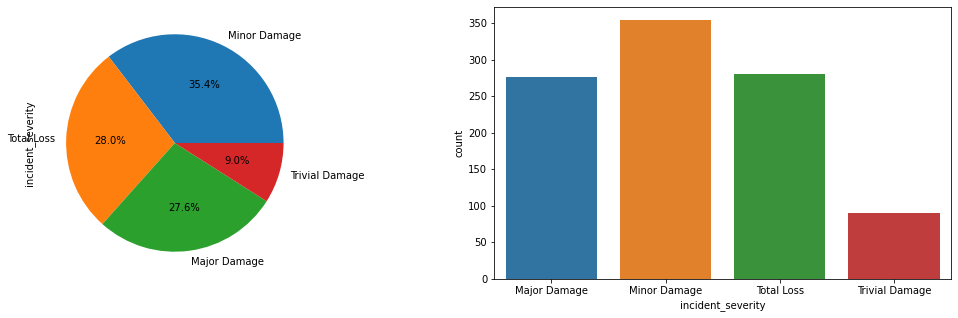

In [37]:
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
df['incident_severity'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['incident_severity'])
df['incident_severity'].value_counts()

- Minor Damage has got the highest counts ( 354 )as incident_severity and Trivial Damage has got the least counts (90) as incident severity.

Police       292
Fire         223
Other        198
Ambulance    196
None          91
Name: authorities_contacted, dtype: int64

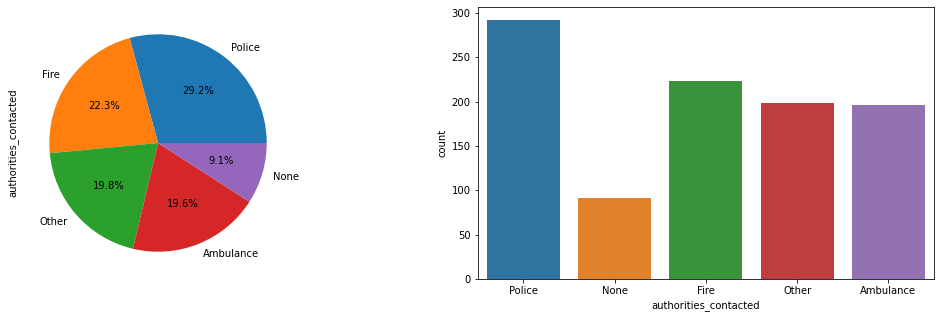

In [38]:
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
df['authorities_contacted'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['authorities_contacted'])
df['authorities_contacted'].value_counts()

- Police has got the highest counts (292) as Authorities_contacted and None has got the least counts (91).

NY    262
SC    248
WV    217
VA    110
NC    110
PA     30
OH     23
Name: incident_state, dtype: int64

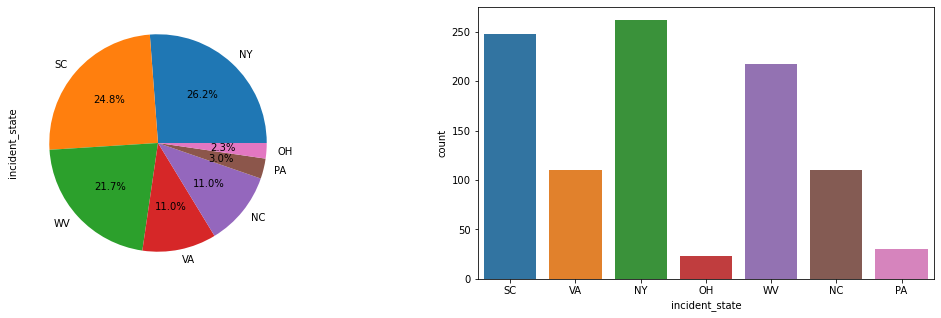

In [39]:
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
df['incident_state'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['incident_state'])
df['incident_state'].value_counts()

- NY has got the highest counts 262 as incident state and OH has got the least counts (23).

Springfield    157
Arlington      152
Columbus       149
Northbend      145
Hillsdale      141
Riverwood      134
Northbrook     122
Name: incident_city, dtype: int64

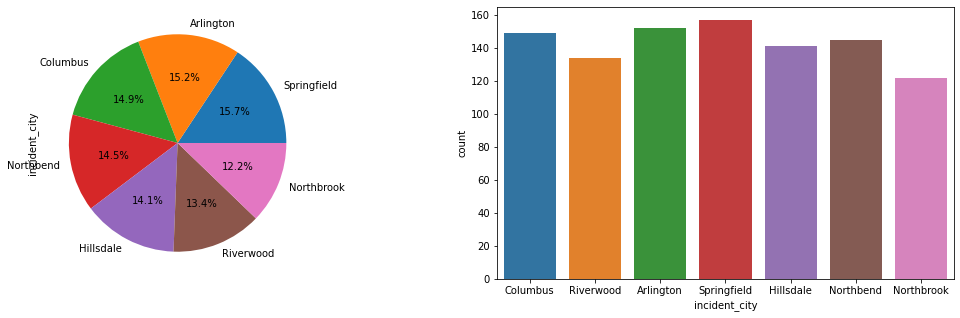

In [40]:
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
df['incident_city'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['incident_city'])
df['incident_city'].value_counts()

- Springfield has got the highest counts (157) as incident_city and Northbrook has got the least counts (122) as incident city.

1    581
3    358
4     31
2     30
Name: number_of_vehicles_involved, dtype: int64

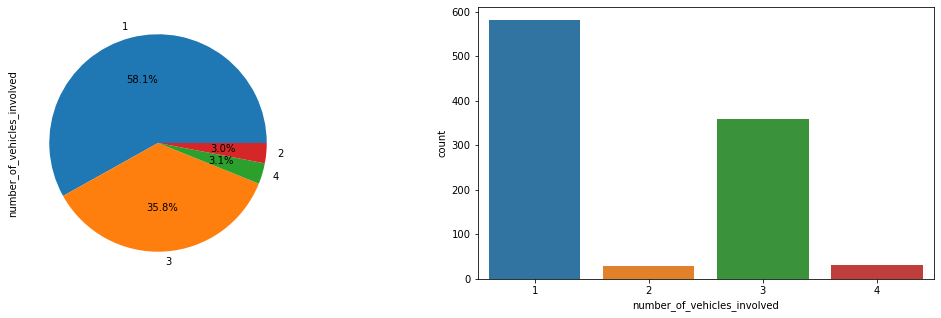

In [44]:
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
df['number_of_vehicles_involved'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['number_of_vehicles_involved'])
df['number_of_vehicles_involved'].value_counts()

- category 1 vehicle has got the highest counts (581) as number of vehicle involved and category 2 vehicles has got the least count.

?      360
NO     338
YES    302
Name: property_damage, dtype: int64

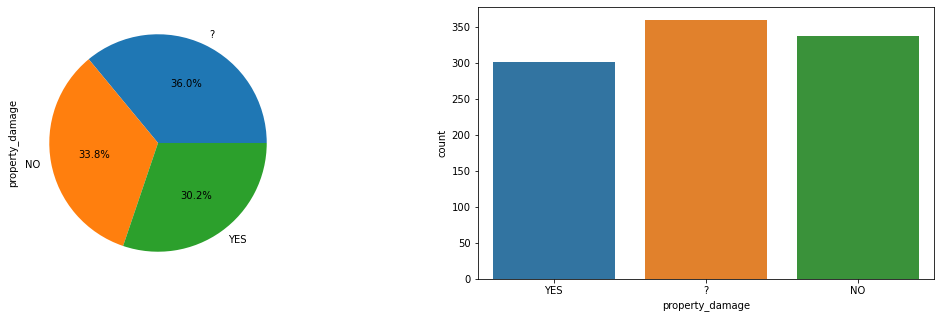

In [45]:
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
df['property_damage'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['property_damage'])
df['property_damage'].value_counts()

- '?' has got the highest counts (360) as property damage but '?' means nan values that we need to deal with. and Category Yes got the least counts (302).

0    340
2    332
1    328
Name: bodily_injuries, dtype: int64

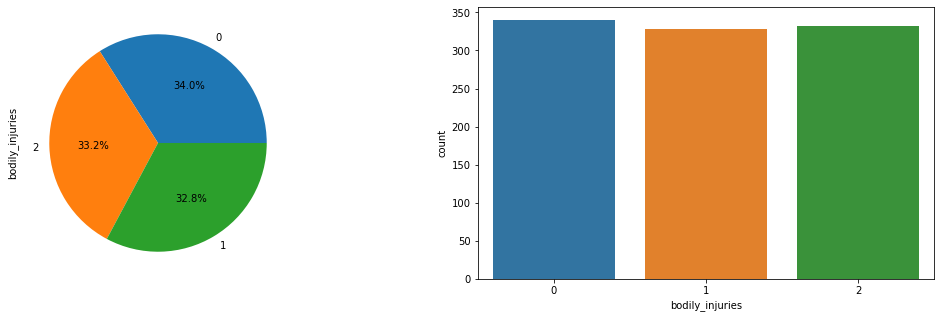

In [46]:
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
df['bodily_injuries'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['bodily_injuries'])
df['bodily_injuries'].value_counts()

- category 0 has got the highest counts (340) as bodily injuries and category 1 has got the least counts (328).

1    258
2    250
0    249
3    243
Name: witnesses, dtype: int64

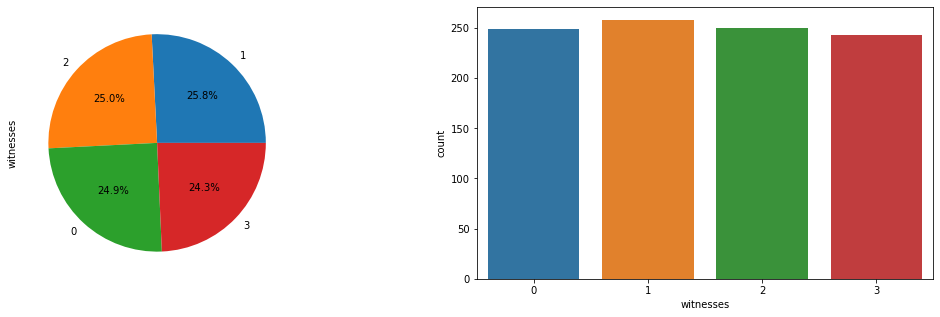

In [47]:
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
df['witnesses'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['witnesses'])
df['witnesses'].value_counts()

- category 1 has got the highest counts (258) as witnesses and category 3 has got the least counts ( 243).

NO     343
?      343
YES    314
Name: police_report_available, dtype: int64

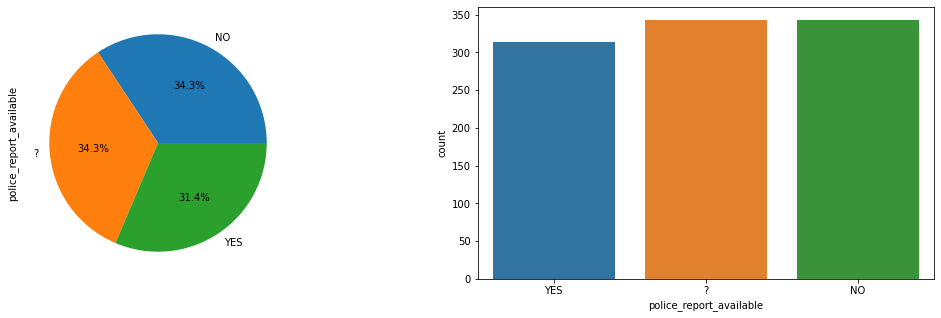

In [48]:
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
df['police_report_available'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['police_report_available'])
df['police_report_available'].value_counts()

- category No and '?' has got the highest counts (343) respectively as police_report_available but '?' means nan values that we need to deal with. And Category Yes got the least counts (314).

Dodge         80
Saab          80
Suburu        80
Nissan        78
Chevrolet     76
BMW           72
Ford          72
Toyota        70
Audi          69
Accura        68
Volkswagen    68
Jeep          67
Mercedes      65
Honda         55
Name: auto_make, dtype: int64

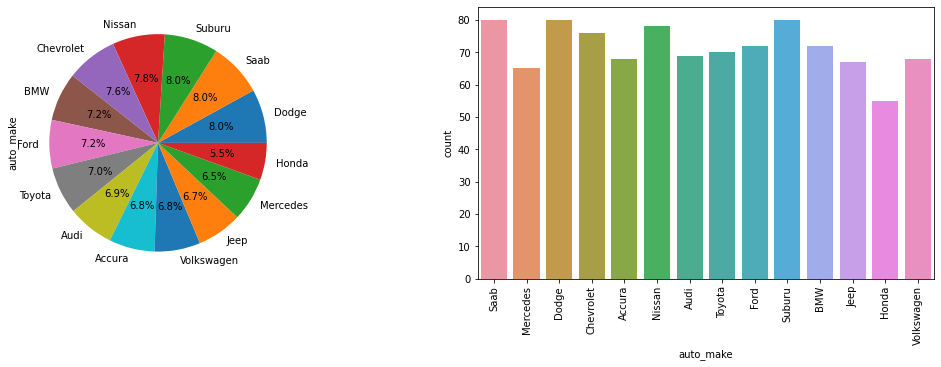

In [50]:
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
df['auto_make'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['auto_make'])
plt.xticks(rotation=90)
df['auto_make'].value_counts()

- Dodge has got the highest counts (80) as auto_make and Honda has got the least counts (55) as auto_make.

RAM               43
Wrangler          42
Neon              37
A3                37
MDX               36
Jetta             35
Passat            33
A5                32
Legacy            32
Pathfinder        31
Malibu            30
Camry             28
Forrestor         28
92x               28
95                27
E400              27
F150              27
93                25
Grand Cherokee    25
Maxima            24
Tahoe             24
Escape            24
X5                23
Ultima            23
Silverado         22
Civic             22
Highlander        22
Fusion            21
TL                20
CRV               20
Impreza           20
ML350             20
Corolla           20
C300              18
3 Series          18
X6                16
M5                15
Accord            13
RSX               12
Name: auto_model, dtype: int64

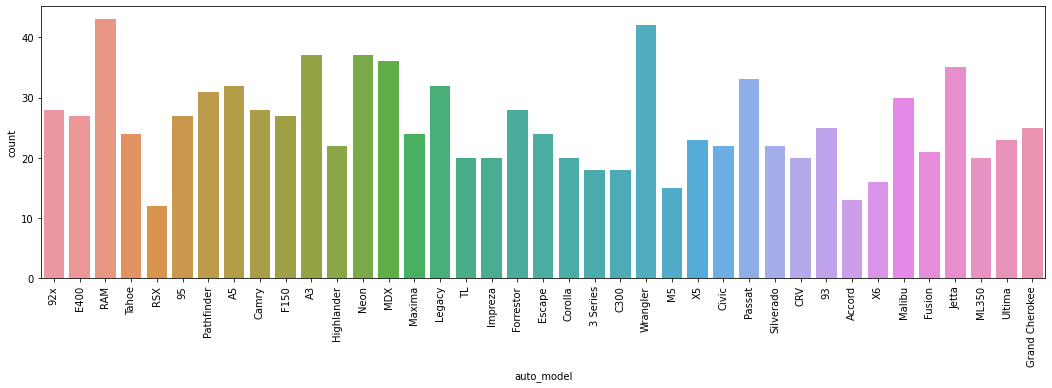

In [51]:
plt.figure(figsize=(18,5))
sns.countplot(df['auto_model'])
plt.xticks(rotation=90)
df['auto_model'].value_counts()

- RAM has got the highest counts (43) as auto_model and RSX  has got the least counts (12) as auto_model.

1995    56
1999    55
2005    54
2011    53
2006    53
2007    52
2003    51
2010    50
2009    50
2013    49
2002    49
2015    47
1997    46
2012    46
2008    45
2014    44
2001    42
2000    42
1998    40
2004    39
1996    37
Name: auto_year, dtype: int64

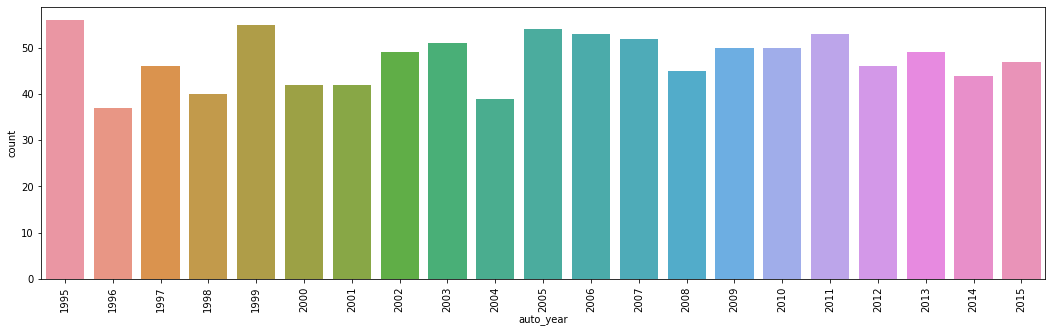

In [52]:
plt.figure(figsize=(18,5))
sns.countplot(df['auto_year'])
plt.xticks(rotation=90)
df['auto_year'].value_counts()

- year 1995 has got the highest counts (56) as auto_year and 1996 has got the least counts (37) as auto_year.

#### Outlier Detection:

Now let's analyze the outliers in continuous data:

In [53]:
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_number                  0.038991
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
auto_year                     -0.048289
_c39                                NaN
dtype: float64

- umbrella_limit, insured_zip, total_claim_amount, vehicle_claim are having skewness.

In [218]:
#before analysis we will take all the continuous and numerical data into list.
df_con_features=df[['months_as_customer','age','policy_annual_premium','capital-gains','capital-loss',
                    'incident_hour_of_the_day','total_claim_amount','injury_claim',
                    'property_claim','vehicle_claim']]

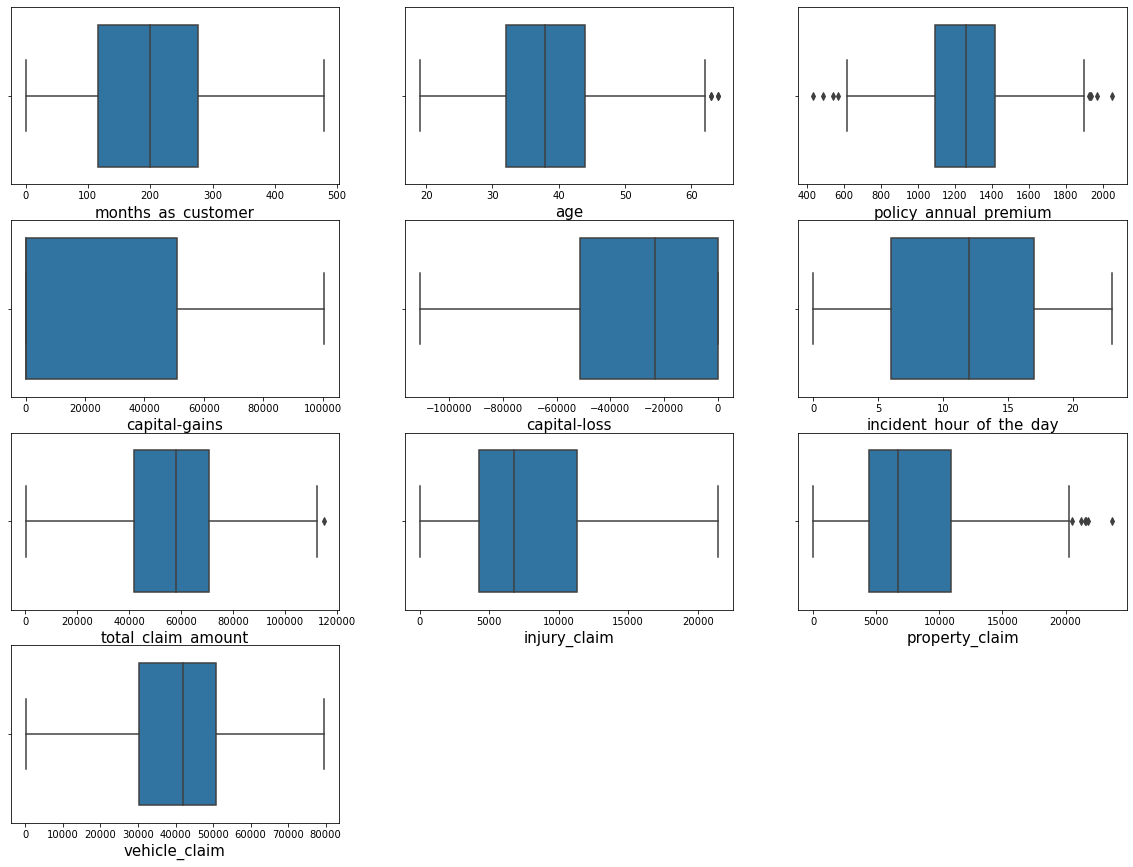

In [56]:
plt.figure(figsize=(20,15),facecolor='white')
plotnumber=1
for column in df_con_features:
    if plotnumber<=12:
        ax=plt.subplot(4,3,plotnumber)
        sns.boxplot(df_con_features[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()  

- Age, policy_annual_premium, total_claim_amount and property claim features have little bit outliers that we need to take care.


#### Bivariate Analysis:

- Before Bivariate Analysis we need to Encode the Target column First, for that we are using LabelEncoder.

In [19]:
l = LabelEncoder()
l_s = ['fraud_reported']
for i in l_s:
    df[i] = l.fit_transform(df[i])

In [13]:
df.head()  # 1 = fraud, 0 = not fraud

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,1,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,1,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,0,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,1,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,0,NaN


- As we can see the target variable is encoded into binary numbers.

#### Bivariate Analysis:

In [89]:
#let's divide the target variable primary_fuel and features
y = df['fraud_reported']
x = df.drop(columns=['fraud_reported'])

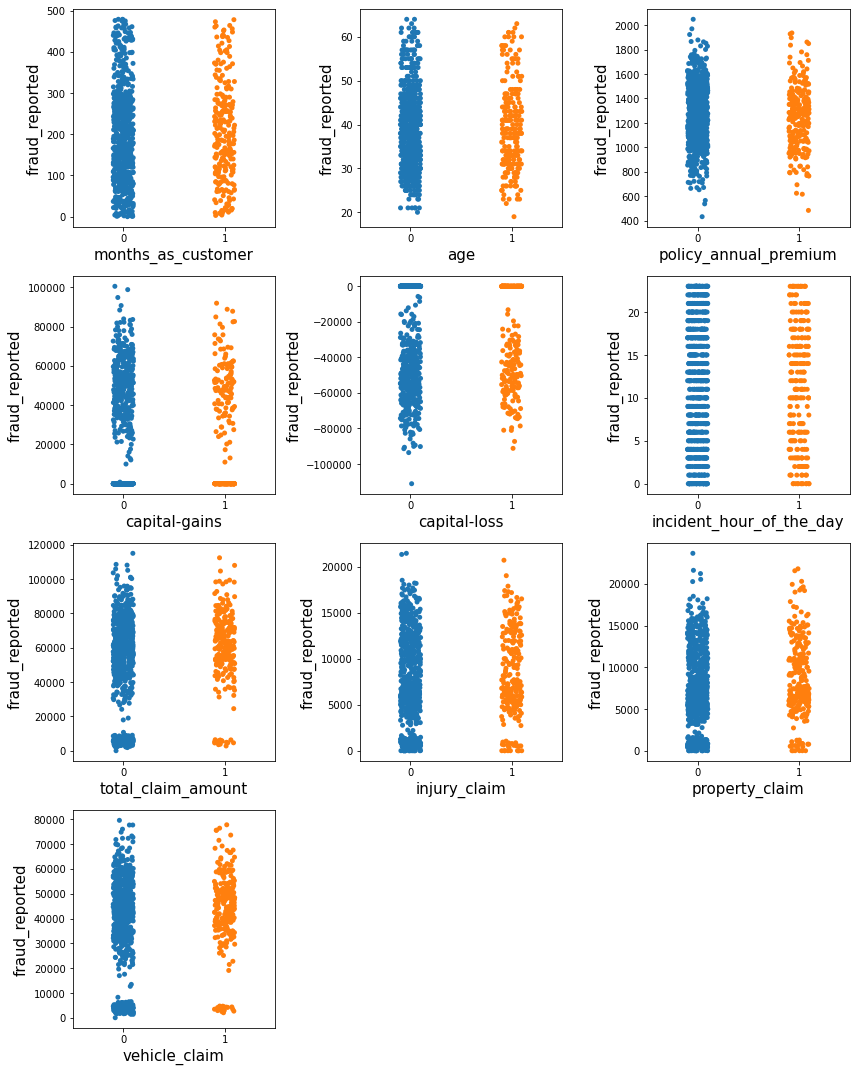

In [94]:
plt.figure(figsize=(12,15),facecolor='white')
plotnumber=1
for column in df_con_features:
    if plotnumber<=10:
        ax=plt.subplot(4,3,plotnumber)
        sns.stripplot(y,df_con_features[column])
        plt.xlabel(column,fontsize=15)
        plt.ylabel('fraud_reported',fontsize=15)
    plotnumber+=1
plt.tight_layout() 

- Upto 300 months as customer, some perople mostly do not fake their accidents but some fake their accidents.
- Upto age 50, some perople mostly do not fake their accidents but some fake their accidents.
- Customes who pay their premium annually are mostly not fraud.
- Customers who are not fraud, capital gain is more for them.
- Customers who are not fraud, capital loss is more for them.
- Customers who have faced accidents from 5 to 10 are mostly not fraud.
- Customers who are not fraud claim property, their claiming amount is sometimes very less.
- Customers who are not fraud their injury claim is more and property claim is also more.

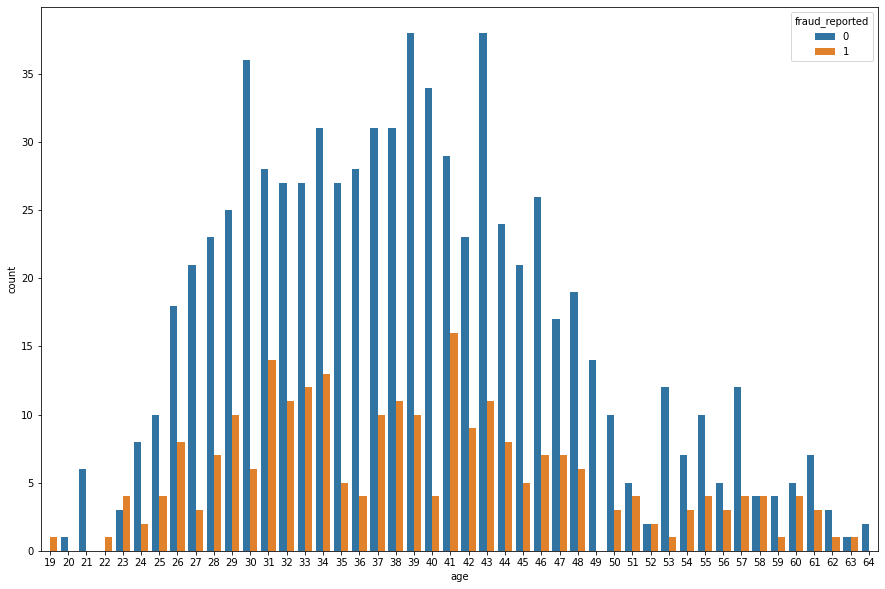

In [47]:
fig = plt.figure(figsize=(15,10))
sns.countplot(data=df, hue='fraud_reported',x= 'age')
plt.show()

- Customer with higher age, the fraud report on the claims reduce, but from the age of 23 to 48 the number of fraud report is high.

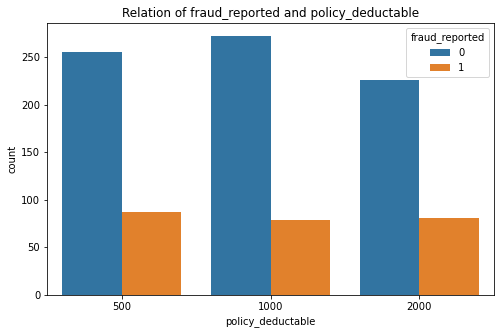

In [63]:
plt.figure(figsize=(8,5))
sns.countplot(x='policy_deductable',hue='fraud_reported',data=df).set_title('Relation of fraud_reported and policy_deductable')
plt.show()

- The fraud report on policy_deductable is less in all 3 types.

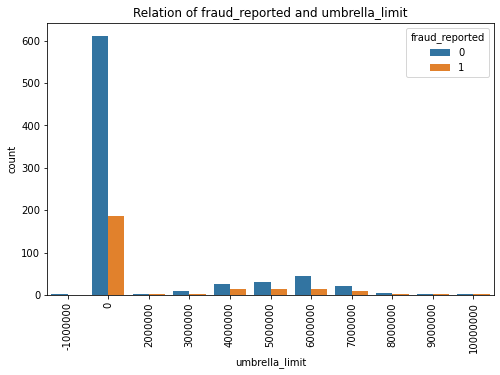

In [62]:
plt.figure(figsize=(8,5))
sns.countplot(x='umbrella_limit',hue='fraud_reported',data=df).set_title('Relation of fraud_reported and umbrella_limit')
plt.xticks(rotation=90)
plt.show()

- In 0 Umbrella limit (which is most common )Fraud report is less.

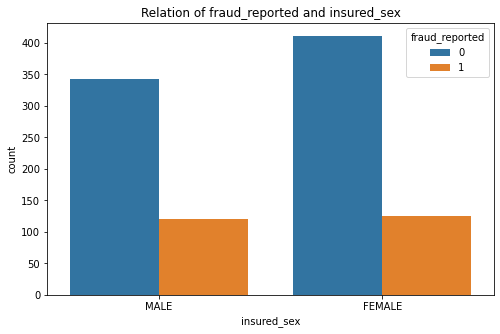

In [60]:
plt.figure(figsize=(8,5))
sns.countplot(x='insured_sex',hue='fraud_reported',data=df).set_title('Relation of fraud_reported and insured_sex')
plt.show()

- Fraud report for both male and female is less.

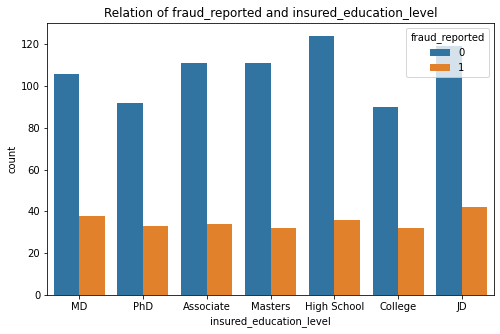

In [59]:
plt.figure(figsize=(8,5))
sns.countplot(x='insured_education_level',hue='fraud_reported',data=df).set_title('Relation of fraud_reported and insured_education_level')
plt.show()

- Fraud report is almost same for all  insured education level. The number is less.

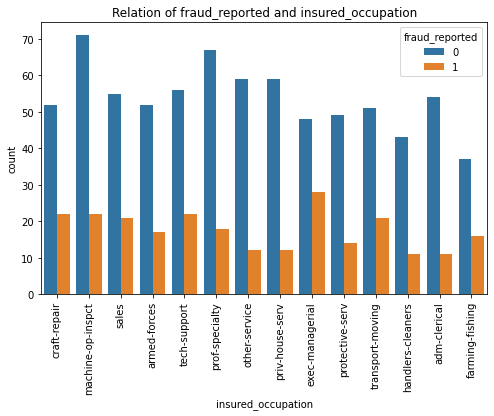

In [57]:
plt.figure(figsize=(8,5))
sns.countplot(x='insured_occupation',hue='fraud_reported',data=df).set_title('Relation of fraud_reported and insured_occupation')
plt.xticks(rotation=90)
plt.show()

- Fraud report is high in exec-managerial post of all the insured occupation. 

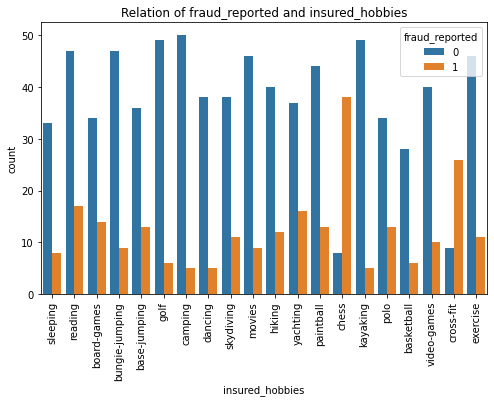

In [56]:
plt.figure(figsize=(8,5))
sns.countplot(x='insured_hobbies',hue='fraud_reported',data=df).set_title('Relation of fraud_reported and insured_hobbies')
plt.xticks(rotation=90)
plt.show()

- Fraud report is highiest in Chess of all the insured hobbies. 

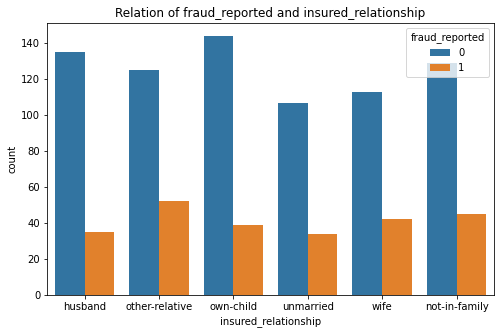

In [54]:
plt.figure(figsize=(8,5))
sns.countplot(x='insured_relationship',hue='fraud_reported',data=df).set_title('Relation of fraud_reported and insured_relationship')
plt.show()

- Fraud reports are more in counts in case of other relatives of insured relationship.

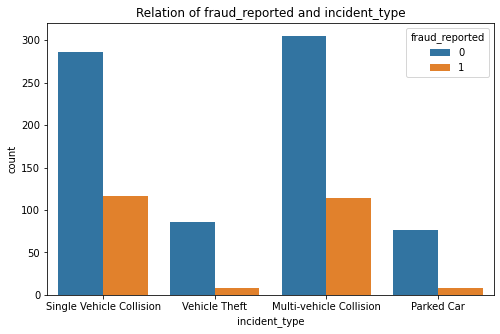

In [53]:
plt.figure(figsize=(8,5))
sns.countplot(x='incident_type',hue='fraud_reported',data=df).set_title('Relation of fraud_reported and incident_type')
plt.show()

-  In all cases of incident type fraud report is there. But fraud report is less in count in every category.

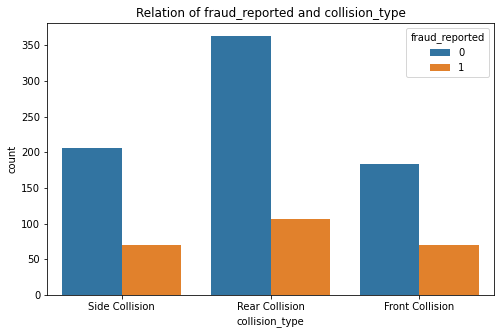

In [52]:
plt.figure(figsize=(8,5))
sns.countplot(x='collision_type',hue='fraud_reported',data=df).set_title('Relation of fraud_reported and collision_type')
plt.show()

- In all cases of collision type fraud report is there. But fraud report is less in count in every category.

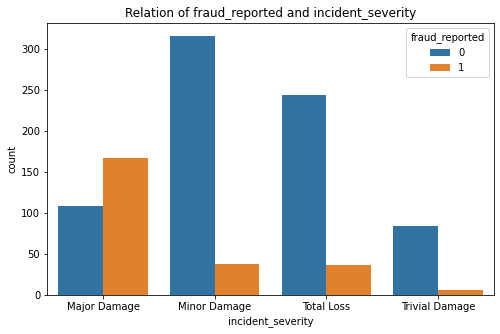

In [50]:
plt.figure(figsize=(8,5))
sns.countplot(x='incident_severity',hue='fraud_reported',data=df).set_title('Relation of fraud_reported and incident_severity')
plt.show()

- In case of major damage as incident severity the fraud report is higher.

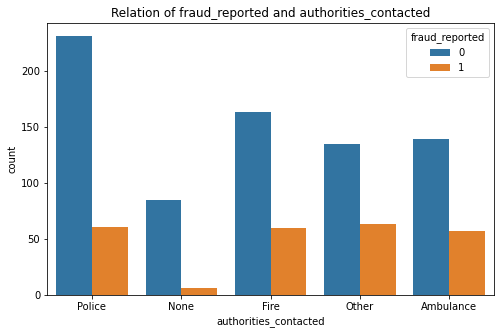

In [66]:
plt.figure(figsize=(8,5))
sns.countplot(x='authorities_contacted',hue='fraud_reported',data=df).set_title('Relation of fraud_reported and authorities_contacted')
plt.show()

- In all cases of authorities contacted, fraud report is there. But fraud report is less in count in every category. And where police is involved the case is more truthful.

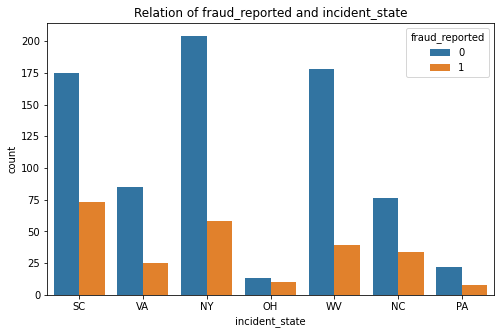

In [67]:
plt.figure(figsize=(8,5))
sns.countplot(x='incident_state',hue='fraud_reported',data=df).set_title('Relation of fraud_reported and incident_state')
plt.show()

-  All the states are having more or less fraud reports.

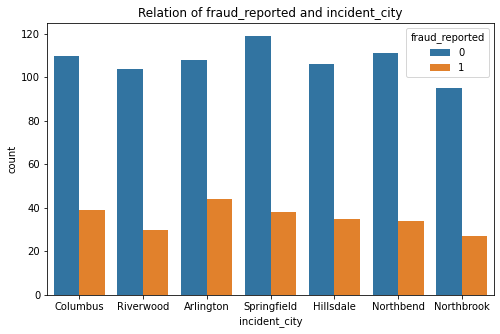

In [68]:
plt.figure(figsize=(8,5))
sns.countplot(x='incident_city',hue='fraud_reported',data=df).set_title('Relation of fraud_reported and incident_city')
plt.show()

- Arlington city has got the highest fraud report as incident city.

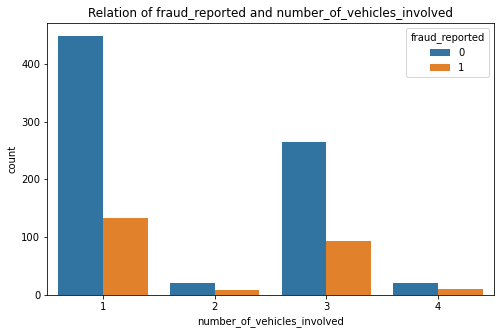

In [69]:
plt.figure(figsize=(8,5))
sns.countplot(x='number_of_vehicles_involved',hue='fraud_reported',data=df).set_title('Relation of fraud_reported and number_of_vehicles_involved')
plt.show()

- Mostly one vehicle involved in accidents and fraud report is there in all the categories.

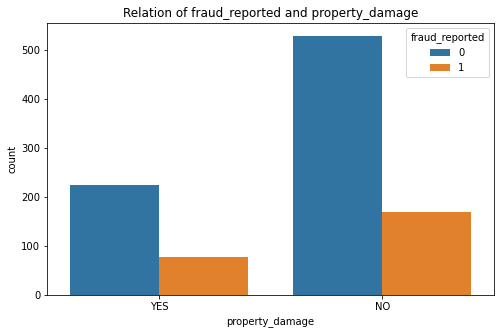

In [70]:
plt.figure(figsize=(8,5))
sns.countplot(x='property_damage',hue='fraud_reported',data=df).set_title('Relation of fraud_reported and property_damage')
plt.show()

- Property is damaged or not fraud report is there.

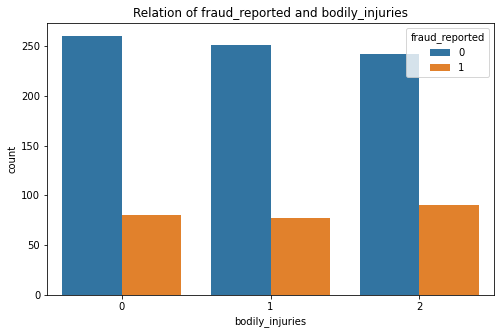

In [71]:
plt.figure(figsize=(8,5))
sns.countplot(x='bodily_injuries',hue='fraud_reported',data=df).set_title('Relation of fraud_reported and bodily_injuries')
plt.show()

- In case of bodily injuries fraud report is there in every case.

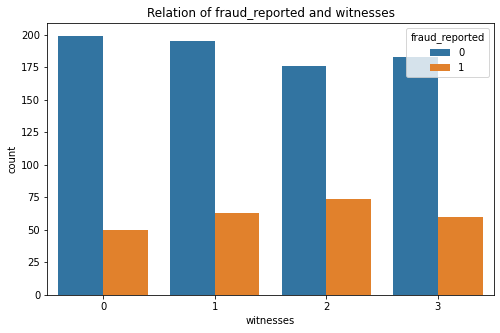

In [72]:
plt.figure(figsize=(8,5))
sns.countplot(x='witnesses',hue='fraud_reported',data=df).set_title('Relation of fraud_reported and witnesses')
plt.show()

- The 2 witnesses category having more fraud reports than other witnesses categories. But fraud report is there in all the categories.

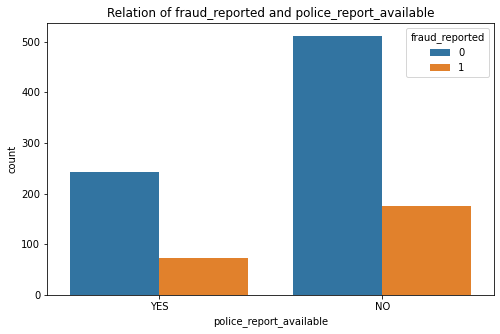

In [73]:
plt.figure(figsize=(8,5))
sns.countplot(x='police_report_available',hue='fraud_reported',data=df).set_title('Relation of fraud_reported and police_report_available')
plt.show()

- Fraud report is more there where police report is not available.

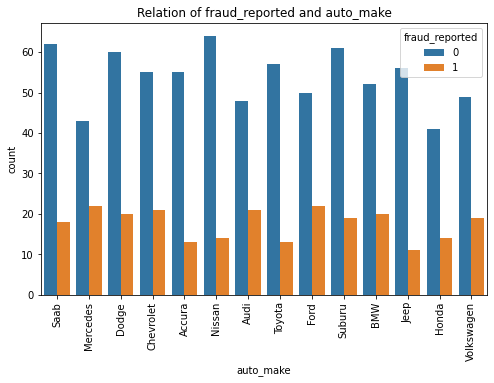

In [75]:
plt.figure(figsize=(8,5))
sns.countplot(x='auto_make',hue='fraud_reported',data=df).set_title('Relation of fraud_reported and auto_make')
plt.xticks(rotation=90)
plt.show()

- Nissan has got the highest non-fraud reports. But in every case including Nissan, fraud report is there.

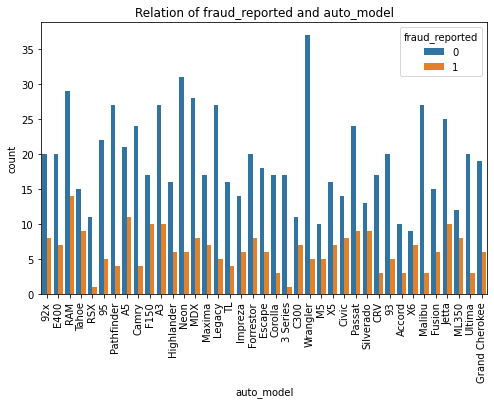

In [76]:
plt.figure(figsize=(8,5))
sns.countplot(x='auto_model',hue='fraud_reported',data=df).set_title('Relation of fraud_reported and auto_model')
plt.xticks(rotation=90)
plt.show()

- Wrangler has got the highest non-fraud reports as auto model. But in every case including Wrangler, fraud report is there. Ram has got the highest fraud reports.

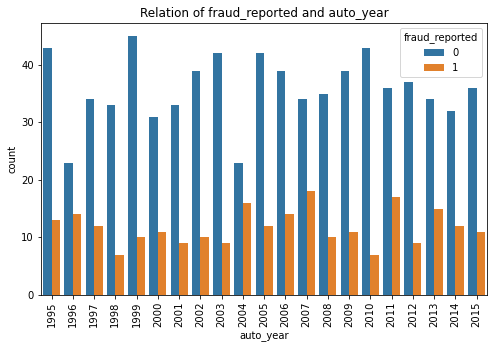

In [77]:
plt.figure(figsize=(8,5))
sns.countplot(x='auto_year',hue='fraud_reported',data=df).set_title('Relation of fraud_reported and auto_year')
plt.xticks(rotation=90)
plt.show()

- In all the years fraud report is there, But in 2007 it is highest.

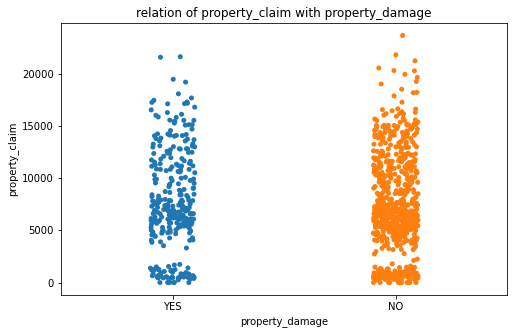

In [32]:
plt.figure(figsize=(8,5))
sns.stripplot(x='property_damage',y='property_claim',data=df).set_title('relation of property_claim with property_damage')
plt.show()

- Customers, without property damage  also claim money.

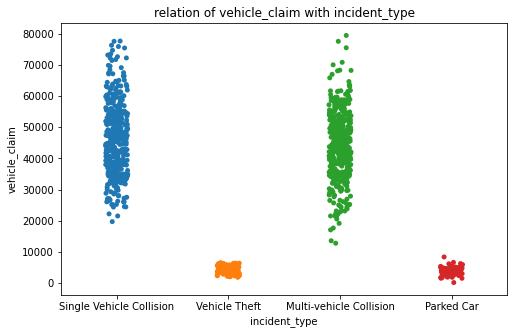

In [33]:
plt.figure(figsize=(8,5))
sns.stripplot(x='incident_type',y='vehicle_claim',data=df).set_title('relation of vehicle_claim with incident_type')
plt.show()

- In case of Single Vehicle Collision and Multi-vehicle Collision the vehicle claim amount is more.

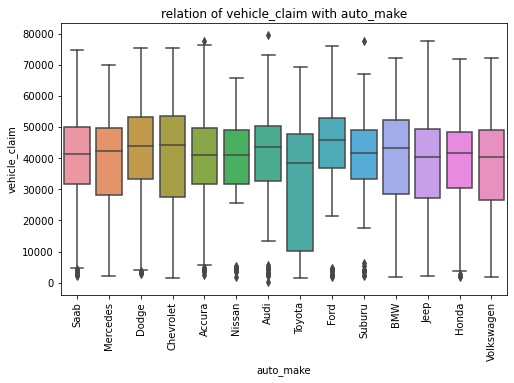

In [37]:
plt.figure(figsize=(8,5))
sns.boxplot(x='auto_make',y='vehicle_claim',data=df).set_title('relation of vehicle_claim with auto_make')
plt.xticks(rotation=90)
plt.show()

-  Customers with Audi and Accura, do the highest vehicle claim.

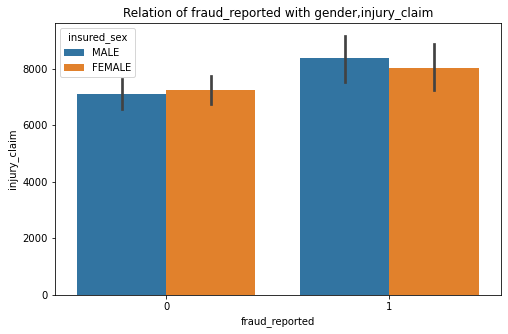

In [15]:
plt.figure(figsize=(8,5))
sns.barplot(x='fraud_reported',y='injury_claim',hue='insured_sex',data=df).set_title('Relation of fraud_reported with gender,injury_claim')
plt.show()

- Female individuals has got highest non fraud reports as claimimg the injury. And male has got highest fraud reports as claimimg the injury

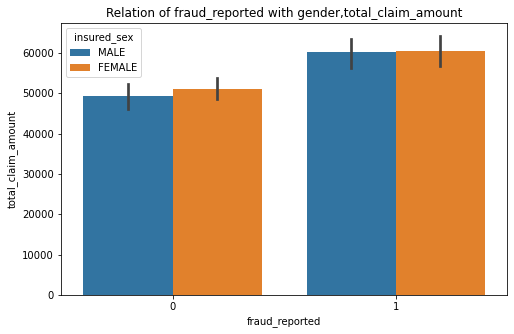

In [16]:
plt.figure(figsize=(8,5))
sns.barplot(x='fraud_reported',y='total_claim_amount',hue='insured_sex',data=df).set_title('Relation of fraud_reported with gender,total_claim_amount')
plt.show()

- Female individuals has got more non fraud reports as total claim amount. 

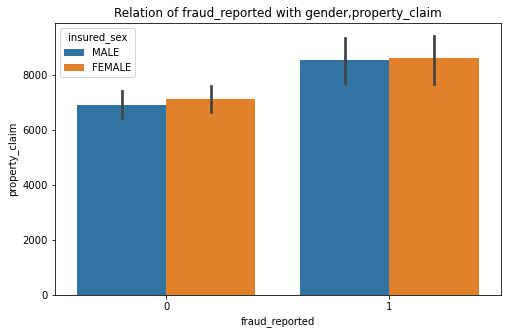

In [17]:
plt.figure(figsize=(8,5))
sns.barplot(x='fraud_reported',y='property_claim',hue='insured_sex',data=df).set_title('Relation of fraud_reported with gender,property_claim')
plt.show()

- Female individuals do more property claim than male individuals. That with fraud reports or without fraud reports.

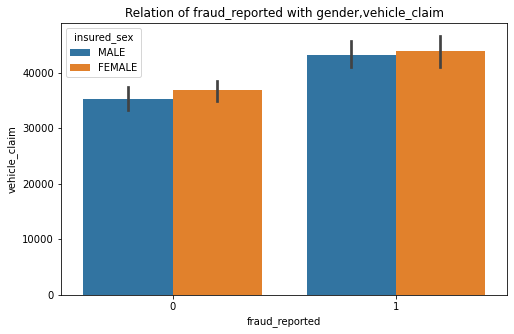

In [18]:
plt.figure(figsize=(8,5))
sns.barplot(x='fraud_reported',y='vehicle_claim',hue='insured_sex',data=df).set_title('Relation of fraud_reported with gender,vehicle_claim')
plt.show()

- Female individuals do more vehicle claim than male individuals. That with fraud reports or without fraud reports.

Now we need to drop unnecessory columns,

In [20]:
# Drop Alert
drop_columns=['_c39']
df=df.drop(columns=drop_columns,axis=1)

- Let's Check the correlations of feature vs feature and feature vs target:

In [221]:
corr = df.corr()
corr

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported
months_as_customer,1.000000,0.922098,0.057555,0.026807,0.005018,0.015498,0.017895,0.006399,0.020209,0.070639,0.014736,-0.010162,0.058383,0.062108,0.065329,0.034940,0.061013,-0.000292,0.020544
age,0.922098,1.000000,0.059413,0.029188,0.014404,0.018126,0.025604,-0.007075,0.007368,0.087161,0.022102,-0.015679,0.052359,0.069863,0.075522,0.060898,0.062588,0.001354,0.012143
policy_number,0.057555,0.059413,1.000000,-0.006738,0.022566,0.008968,0.007083,0.009802,-0.005669,0.000113,0.013432,-0.004558,-0.012661,-0.018009,-0.008762,-0.010678,-0.020184,-0.000183,-0.029443
policy_deductable,0.026807,0.029188,-0.006738,1.000000,-0.003245,0.010870,0.004545,0.035212,-0.023544,0.060935,0.051214,-0.022765,0.066639,0.022839,0.039107,0.064792,0.005269,0.026105,0.014817
policy_annual_premium,0.005018,0.014404,0.022566,-0.003245,1.000000,-0.006247,0.032354,-0.013738,0.023547,-0.001578,-0.045991,0.026780,0.002332,0.009094,-0.017633,-0.011654,0.020246,-0.049226,-0.014480
umbrella_limit,0.015498,0.018126,0.008968,0.010870,-0.006247,1.000000,0.019671,-0.047268,-0.024056,-0.023257,-0.021270,0.022743,-0.006738,-0.040344,-0.045412,-0.023790,-0.038584,0.009893,0.058622
insured_zip,0.017895,0.025604,0.007083,0.004545,0.032354,0.019671,1.000000,0.006303,0.049372,0.008274,0.027448,0.028695,0.019805,-0.033873,-0.017495,-0.006841,-0.041083,-0.032736,0.019368
capital-gains,0.006399,-0.007075,0.009802,0.035212,-0.013738,-0.047268,0.006303,1.000000,-0.046904,-0.016406,0.061643,0.055829,-0.017651,0.015980,0.025934,-0.000779,0.015836,0.031398,-0.019173
capital-loss,0.020209,0.007368,-0.005669,-0.023544,0.023547,-0.024056,0.049372,-0.046904,1.000000,-0.025054,-0.014895,-0.024418,-0.041330,-0.036060,-0.046060,-0.022863,-0.032665,-0.056615,-0.014863
incident_hour_of_the_day,0.070639,0.087161,0.000113,0.060935,-0.001578,-0.023257,0.008274,-0.016406,-0.025054,1.000000,0.120794,-0.034563,0.006527,0.217702,0.165768,0.179536,0.215626,0.021368,0.004316


####  Heat map (Correlation Matrix):

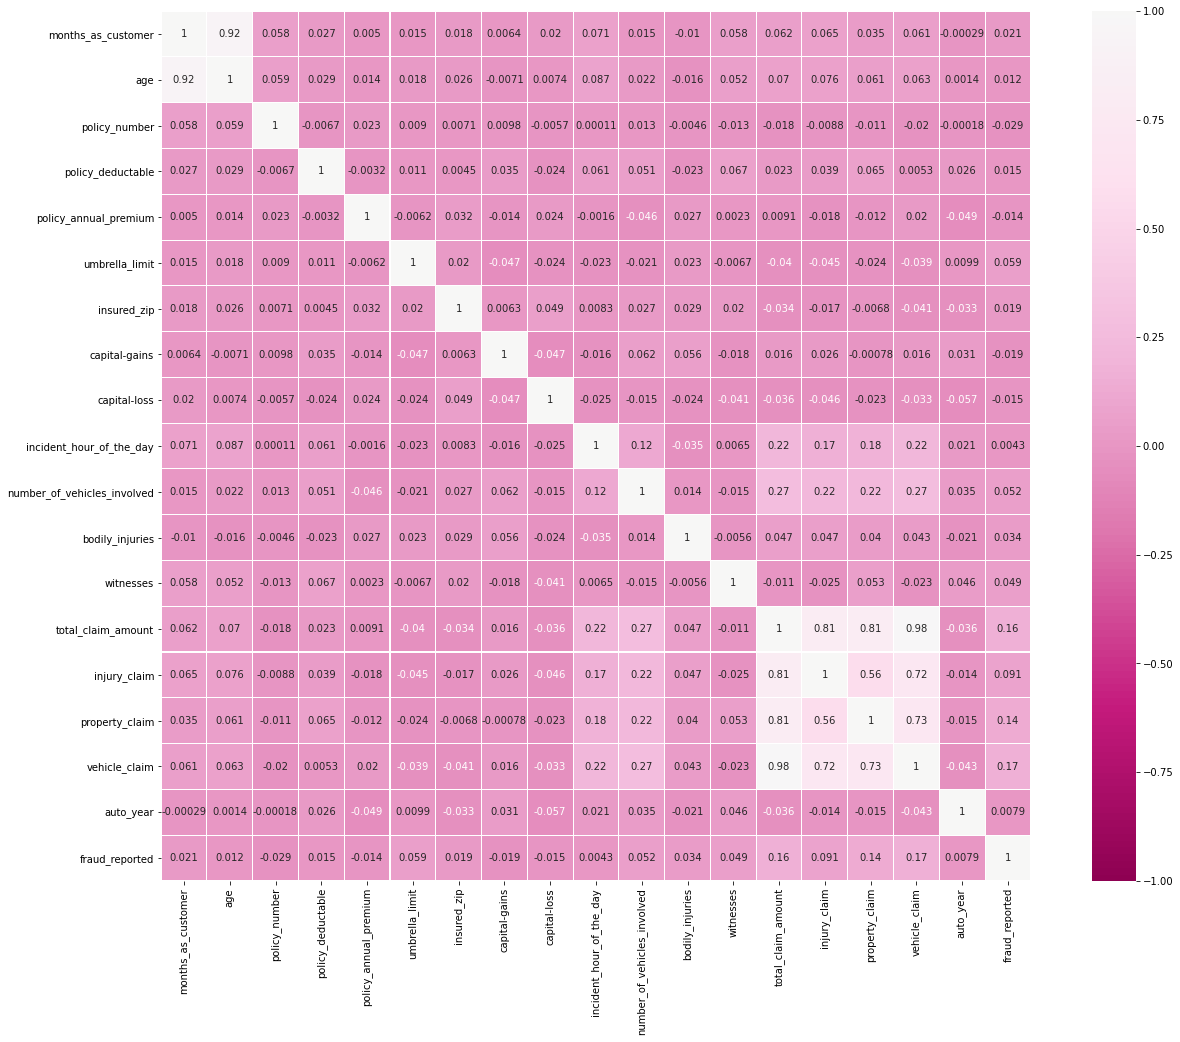

In [222]:
#Checking correlation matrix(heatmap) to understand the feature vs feature relationship.

plt.figure(figsize=(22,16))
sns.heatmap(corr,cbar=True,cmap='PiYG',vmin=-1,vmax=1,square=True,fmt='.2g',annot=True,
            center=True,annot_kws={'size':10},linewidths=.1,linecolor='white')
plt.show()

- Age and months as customer has correlation (0.92)
- Vehicle claim, property claim, injury claim are having correlation with total claim amount that we need to take care.
- total claim amount has good correlation with fraud reported.

#### Data Cleaning:

1. Filling missing values

In [21]:
# mode will be used to replace missing values from categorical column collision type
df['collision_type'].fillna(df['collision_type'].mode()[0], inplace = True)

In [22]:
# mode will be used to replace missing values from categorical column collision type
df['property_damage'].fillna('NO', inplace = True)

In [23]:
# mode will be used to replace missing values from categorical column collision type
df['police_report_available'].fillna('NO', inplace = True)

In [24]:
df.isna().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

- There is no missing value present in the dataset.


2. Skewness removal

In [227]:
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_number                  0.038991
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
auto_year                     -0.048289
fraud_reported                 1.175051
dtype: float64

- There is skewness present in 'Umbrella_limit' and 'Total claim amount' features. 

We will clean those skewness by using PowerTransformer.

In [25]:
# skewed features are taken into a list
features=['umbrella_limit','total_claim_amount']

In [26]:
scaler=PowerTransformer(method='yeo-johnson')  # using yeo-johnson method

In [27]:
df[features]=scaler.fit_transform(df[features].values)  # scaling the features

In [28]:
df[features]

,umbrella_limit,total_claim_amount
0,-0.349113,0.715714
1,1.357817,-1.776979
2,1.357817,-0.716825
3,1.644005,0.391426
4,1.644005,-1.729802
...,...,...
995,-0.349113,1.338829
996,-0.349113,2.202447
997,0.756509,0.553012
998,1.357817,-0.247520


- Now the features are looking better than before.

#### Encoding:

Let's encode the nominal data. For that we are using Ordinal Encoder.

In [29]:
en=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=en.fit_transform(df[i].values.reshape(-1,1))
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,532.0,2.0,1.0,1000,1406.91,-0.349113,466132,...,2,1.0,0.715714,6510,13020,52080,10.0,1.0,2004,1
1,228,42,342868,821.0,1.0,1.0,2000,1197.22,1.357817,468176,...,0,0.0,-1.776979,780,780,3510,8.0,12.0,2007,1
2,134,29,687698,186.0,2.0,0.0,2000,1413.14,1.357817,430632,...,3,0.0,-0.716825,7700,3850,23100,4.0,30.0,2007,0
3,256,41,227811,766.0,0.0,1.0,2000,1415.74,1.644005,608117,...,2,0.0,0.391426,6340,6340,50720,3.0,34.0,2014,1
4,228,44,367455,181.0,0.0,2.0,1000,1583.91,1.644005,610706,...,1,0.0,-1.729802,1300,650,4550,0.0,31.0,2009,0


- As we can see our dataset is almost ready for model creation. But before that we will drop some unnecessory columns.

In [30]:
# dropping the column because it's containing only unique serial numbers
df.drop(['policy_number'],axis=1, inplace=True)

In [31]:
# this data is not required 
df.drop(['policy_bind_date'],axis=1, inplace=True)

- It's time to divide the dataset into feature and target:

In [32]:
y=df['fraud_reported']
x=df.drop(columns=['fraud_reported'])
y

0      1
1      1
2      0
3      1
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: fraud_reported, Length: 1000, dtype: int32

- As the target data is imbalanced , we are using smote to balance that.

In [33]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x,y = sm.fit_resample(x,y)

In [34]:
y.value_counts()

1    753
0    753
Name: fraud_reported, dtype: int64

- The target variable is balanced. Now it's time to Standardize the features as they are in different scales.

#### Standardization:

In [35]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [36]:
# Checking multicolinearity of the features using VIF
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(x_scaled,i)for i in range(x_scaled.shape[1])]
vif["Features"] = x.columns
vif

,vif,Features
0,7.372323,months_as_customer
1,7.373993,age
2,1.050213,policy_state
3,1.045727,policy_csl
4,1.041726,policy_deductable
5,1.051973,policy_annual_premium
6,1.040345,umbrella_limit
7,1.056830,insured_zip
8,1.041854,insured_sex
9,1.046958,insured_education_level


- As we can see, there are features those are correlated with each other. We need to drop them.

In [37]:
# Drop Alert
drop_column=['months_as_customer','injury_claim','property_claim','vehicle_claim','incident_location']
df=df.drop(columns=drop_column,axis=1)

#### Hold Out Method:

Model will be built on Hold Out method(75/25 training and test split) to gauge how well the classifier is working.

In [38]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=42)

#### Model Creation:
Now let's see the Accuracy scores according to five models we have used below. we are using models like,

1. Logistic Regression,
2. Decision Tree Classifier,
3. Random Forest Classifier,
4. K-Nearest Neighbors Classifier,
5. Gradient Boosting Classifier
6. Support Vector Classifier

#### 1. Logistic Regression:

In [39]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
lr_pred = lr.predict(x_train)
lr_clf_report = pd.DataFrame(classification_report(y_train,lr_pred,output_dict=True))
print("\n=======================Train Result===========================")
print(f"Accuracy score:{accuracy_score(y_train,lr_pred)*100:.2f}%")
print("_______________________________________________________________")
print(f"CLASSIFICATION REPORT:\n{lr_clf_report}")
print("________________________________________________________________")
print(f" Confusion Matrix:\n{confusion_matrix(y_train,lr_pred)}\n")
      


=======================Train Result===========================
Accuracy score:77.41%
_______________________________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.785080    0.763251  0.774136     0.774165      0.774388
recall       0.767361    0.781193  0.774136     0.774277      0.774136
f1-score     0.776119    0.772118  0.774136     0.774119      0.774159
support    576.000000  553.000000  0.774136  1129.000000   1129.000000
________________________________________________________________
 Confusion Matrix:
[[442 134]
 [121 432]]



In [40]:
lr_pred=lr.predict(x_test)
lr_clf_report = pd.DataFrame(classification_report(y_test,lr_pred,output_dict=True))
print("\n=======================Test Result of LR ===========================")
print(f"Accuracy score:{accuracy_score(y_test,lr_pred)*100:.2f}%")
print("_______________________________________________________________")
print(f"CLASSIFICATION REPORT:\n{lr_clf_report}")
print("________________________________________________________________")
print(f" Confusion Matrix:\n{confusion_matrix(y_test,lr_pred)}\n")      
      


=======================Test Result of LR ===========================
Accuracy score:76.39%
_______________________________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.778481    0.753425  0.763926    0.765953      0.765189
recall       0.694915    0.825000  0.763926    0.759958      0.763926
f1-score     0.734328    0.787589  0.763926    0.760959      0.762584
support    177.000000  200.000000  0.763926  377.000000    377.000000
________________________________________________________________
 Confusion Matrix:
[[123  54]
 [ 35 165]]



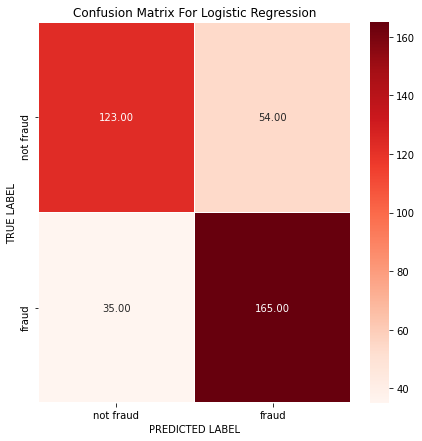

In [41]:
cm = confusion_matrix(y_test,lr_pred)

x_axis_labels=['not fraud','fraud']
y_axis_labels=['not fraud','fraud']

ax=plt.subplots(figsize=(7,7))
sns.heatmap(cm,annot=True,linewidths=0.1,fmt='.2f',cmap='Reds',xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel('PREDICTED LABEL')
plt.ylabel('TRUE LABEL')
plt.title('Confusion Matrix For Logistic Regression')

plt.show()

In [42]:
#checking ROC_AUC Score of Logistic Regression:
roc_auc_score(y_test,lr.predict(x_test))

0.759957627118644

#### 2. Decision Tree Classifier :

In [43]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt_pred = dt.predict(x_train)
dt_clf_report = pd.DataFrame(classification_report(y_train,dt_pred,output_dict=True))
print("\n=======================Train Result===========================")
print(f"Accuracy score:{accuracy_score(y_train,dt_pred)*100:.2f}%")
print("_______________________________________________________________")
print(f"CLASSIFICATION REPORT:\n{dt_clf_report}")
print("________________________________________________________________")
print(f" Confusion Matrix:\n{confusion_matrix(y_train,dt_pred)}\n")
      


=======================Train Result===========================
Accuracy score:100.00%
_______________________________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    576.0  553.0       1.0     1129.0        1129.0
________________________________________________________________
 Confusion Matrix:
[[576   0]
 [  0 553]]



In [44]:
dt_pred=dt.predict(x_test)
dt_clf_report = pd.DataFrame(classification_report(y_test,dt_pred,output_dict=True))
print("\n=======================Test Result of dt_clf===========================")
print(f"Accuracy score:{accuracy_score(y_test,dt_pred)*100:.2f}%")
print("_______________________________________________________________")
print(f"CLASSIFICATION REPORT:\n{dt_clf_report}")
print("________________________________________________________________")
print(f" Confusion Matrix:\n{confusion_matrix(y_test,dt_pred)}\n")      
      


=======================Test Result of dt_clf===========================
Accuracy score:82.49%
_______________________________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.844720    0.810185  0.824934    0.827453      0.826399
recall       0.768362    0.875000  0.824934    0.821681      0.824934
f1-score     0.804734    0.841346  0.824934    0.823040      0.824157
support    177.000000  200.000000  0.824934  377.000000    377.000000
________________________________________________________________
 Confusion Matrix:
[[136  41]
 [ 25 175]]



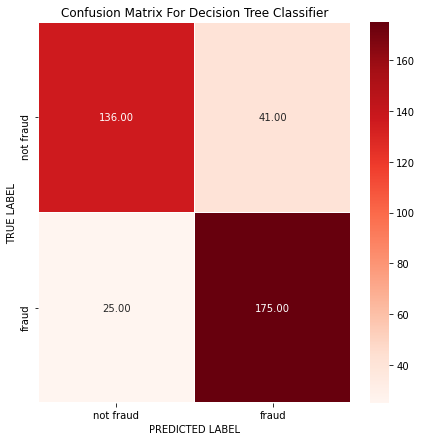

In [45]:
cm = confusion_matrix(y_test,dt_pred)

x_axis_labels=['not fraud','fraud']
y_axis_labels=['not fraud','fraud']

ax=plt.subplots(figsize=(7,7))
sns.heatmap(cm,annot=True,linewidths=0.1,fmt='.2f',cmap='Reds',xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel('PREDICTED LABEL')
plt.ylabel('TRUE LABEL')
plt.title('Confusion Matrix For Decision Tree Classifier')

plt.show()

In [46]:
#ROC_AUC Score of Decision Tree Classifier:
roc_auc_score(y_test,dt.predict(x_test))

0.8216807909604521

#### 3. Random Forest Classifier :

In [47]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
rf_pred = rf.predict(x_train)
rf_clf_report = pd.DataFrame(classification_report(y_train,rf_pred,output_dict=True))
print("\n=======================Train Result===========================")
print(f"Accuracy score:{accuracy_score(y_train,rf_pred)*100:.2f}%")
print("_______________________________________________________________")
print(f"CLASSIFICATION REPORT:\n{rf_clf_report}")
print("________________________________________________________________")
print(f" Confusion Matrix:\n{confusion_matrix(y_train,rf_pred)}\n")


=======================Train Result===========================
Accuracy score:100.00%
_______________________________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    576.0  553.0       1.0     1129.0        1129.0
________________________________________________________________
 Confusion Matrix:
[[576   0]
 [  0 553]]



In [48]:
rf_pred=rf.predict(x_test)
rf_clf_report = pd.DataFrame(classification_report(y_test,rf_pred,output_dict=True))
print("\n=======================Test Result of RF_clf===========================")
print(f"Accuracy score:{accuracy_score(y_test,rf_pred)*100:.2f}%")
print("_______________________________________________________________")
print(f"CLASSIFICATION REPORT:\n{rf_clf_report}")
print("________________________________________________________________")
print(f" Confusion Matrix:\n{confusion_matrix(y_test,rf_pred)}\n")     


=======================Test Result of RF_clf===========================
Accuracy score:86.47%
_______________________________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.853933    0.874372  0.864721    0.864152      0.864776
recall       0.858757    0.870000  0.864721    0.864379      0.864721
f1-score     0.856338    0.872180  0.864721    0.864259      0.864742
support    177.000000  200.000000  0.864721  377.000000    377.000000
________________________________________________________________
 Confusion Matrix:
[[152  25]
 [ 26 174]]



Text(0.5, 1.0, 'Confusion Matrix For Random Forest Classifier')

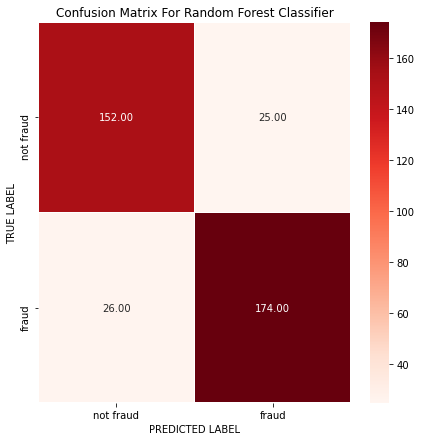

In [49]:
cm = confusion_matrix(y_test,rf_pred)

x_axis_labels=['not fraud','fraud']
y_axis_labels=['not fraud','fraud']

ax=plt.subplots(figsize=(7,7))
sns.heatmap(cm,annot=True,linewidths=0.1,fmt='.2f',cmap='Reds',xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel('PREDICTED LABEL')
plt.ylabel('TRUE LABEL')
plt.title('Confusion Matrix For Random Forest Classifier')

In [50]:
# ROC_AOC Score of Random Forest Classifier:
roc_auc_score(y_test,rf.predict(x_test))

0.8643785310734464

#### 4. K-Neighbors Classifier :

In [51]:
kn = KNeighborsClassifier()
kn.fit(x_train,y_train)
kn_pred = kn.predict(x_train)
kn_clf_report = pd.DataFrame(classification_report(y_train,kn_pred,output_dict=True))
print("\n=======================Train Result===========================")
print(f"Accuracy score:{accuracy_score(y_train,kn_pred)*100:.2f}%")
print("_______________________________________________________________")
print(f"CLASSIFICATION REPORT:\n{kn_clf_report}")
print("________________________________________________________________")
print(f" Confusion Matrix:\n{confusion_matrix(y_train,kn_pred)}\n")


=======================Train Result===========================
Accuracy score:72.01%
_______________________________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.974453    0.638596  0.720106     0.806525      0.809946
recall       0.463542    0.987342  0.720106     0.725442      0.720106
f1-score     0.628235    0.775568  0.720106     0.701902      0.700401
support    576.000000  553.000000  0.720106  1129.000000   1129.000000
________________________________________________________________
 Confusion Matrix:
[[267 309]
 [  7 546]]



In [52]:
kn_pred=kn.predict(x_test)
kn_clf_report = pd.DataFrame(classification_report(y_test,kn_pred,output_dict=True))
print("\n=======================Test Result of KNN_clf===========================")
print(f"Accuracy score:{accuracy_score(y_test,kn_pred)*100:.2f}%")
print("_______________________________________________________________")
print(f"CLASSIFICATION REPORT:\n{kn_clf_report}")
print("________________________________________________________________")
print(f" Confusion Matrix:\n{confusion_matrix(y_test,kn_pred)}\n")      
      


=======================Test Result of KNN_clf===========================
Accuracy score:64.99%
_______________________________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.909091    0.605590  0.649867    0.757340      0.748083
recall       0.282486    0.975000  0.649867    0.628743      0.649867
f1-score     0.431034    0.747126  0.649867    0.589080      0.598723
support    177.000000  200.000000  0.649867  377.000000    377.000000
________________________________________________________________
 Confusion Matrix:
[[ 50 127]
 [  5 195]]



Text(0.5, 1.0, 'Confusion Matrix For K-Nearest Neighbor Classifier')

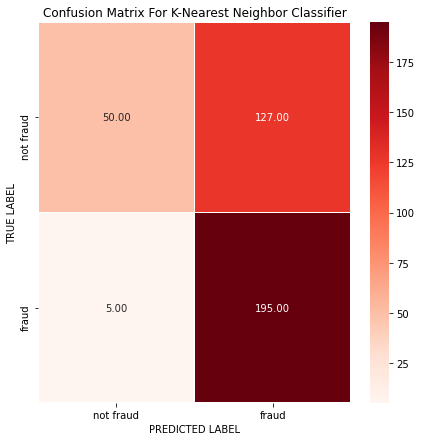

In [53]:
cm = confusion_matrix(y_test,kn_pred)

x_axis_labels=['not fraud','fraud']
y_axis_labels=['not fraud','fraud']

ax=plt.subplots(figsize=(7,7))
sns.heatmap(cm,annot=True,linewidths=0.1,fmt='.2f',cmap='Reds',xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel('PREDICTED LABEL')
plt.ylabel('TRUE LABEL')
plt.title('Confusion Matrix For K-Nearest Neighbor Classifier')

In [54]:
# ROC_AUC Score of K-Nearest Kneibors Classifier:
roc_auc_score(y_test,kn.predict(x_test))

0.6287429378531073

#### 5. Gradient Boosting Classifier:

In [55]:
gbdt_clf = GradientBoostingClassifier()
gbdt_clf.fit(x_train,y_train)
pred=gbdt_clf.predict(x_train)
gbdt_clf_report = pd.DataFrame(classification_report(y_train,pred,output_dict=True))
print("\n=======================Train Result===========================")
print(f"Accuracy score:{accuracy_score(y_train,pred)*100:.2f}%")
print("_______________________________________________________________")
print(f"CLASSIFICATION REPORT:\n{gbdt_clf_report}")
print("________________________________________________________________")
print(f" Confusion Matrix:\n{confusion_matrix(y_train,pred)}\n")


=======================Train Result===========================
Accuracy score:97.70%
_______________________________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.972509    0.981718  0.976971     0.977114      0.977020
recall       0.982639    0.971067  0.976971     0.976853      0.976971
f1-score     0.977547    0.976364  0.976971     0.976956      0.976968
support    576.000000  553.000000  0.976971  1129.000000   1129.000000
________________________________________________________________
 Confusion Matrix:
[[566  10]
 [ 16 537]]



In [56]:
pred=gbdt_clf.predict(x_test)
clf_report = pd.DataFrame(classification_report(y_test,pred,output_dict=True))
print("\n=======================Test Result===========================")
print(f"Accuracy score:{accuracy_score(y_test,pred)*100:.2f}%")
print("_______________________________________________________________")
print(f"CLASSIFICATION REPORT:\n{clf_report}")
print("________________________________________________________________")
print(f" Confusion Matrix:\n{confusion_matrix(y_test,pred)}\n") 


=======================Test Result===========================
Accuracy score:87.27%
_______________________________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.877193    0.868932  0.872679    0.873063      0.872811
recall       0.847458    0.895000  0.872679    0.871229      0.872679
f1-score     0.862069    0.881773  0.872679    0.871921      0.872522
support    177.000000  200.000000  0.872679  377.000000    377.000000
________________________________________________________________
 Confusion Matrix:
[[150  27]
 [ 21 179]]



Text(0.5, 1.0, 'Confusion Matrix Of Gradient Boosting Classifier')

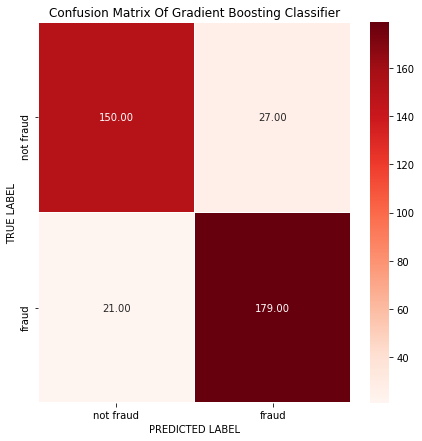

In [57]:
cm = confusion_matrix(y_test,pred)

x_axis_labels=['not fraud','fraud']
y_axis_labels=['not fraud','fraud']

ax=plt.subplots(figsize=(7,7))
sns.heatmap(cm,annot=True,linewidths=0.1,fmt='.2f',cmap='Reds',xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel('PREDICTED LABEL')
plt.ylabel('TRUE LABEL')
plt.title('Confusion Matrix Of Gradient Boosting Classifier')

In [58]:
#ROC_AUC Score of Gradient Boosting Classifier:
roc_auc_score(y_test,gbdt_clf.predict(x_test))

0.871228813559322

#### 6. Support Vector Classifier:

In [59]:
svc = SVC()
svc.fit(x_train,y_train)
svc_pred = svc.predict(x_train)
svc_clf_report = pd.DataFrame(classification_report(y_train,svc_pred,output_dict=True))
print("\n=======================Train Result===========================")
print(f"Accuracy score:{accuracy_score(y_train,svc_pred)*100:.2f}%")
print("_______________________________________________________________")
print(f"CLASSIFICATION REPORT:\n{svc_clf_report}")
print("________________________________________________________________")
print(f" Confusion Matrix:\n{confusion_matrix(y_train,svc_pred)}\n")
      


=======================Train Result===========================
Accuracy score:96.37%
_______________________________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.949580    0.979401  0.963685     0.964490      0.964187
recall       0.980903    0.945750  0.963685     0.963327      0.963685
f1-score     0.964987    0.962282  0.963685     0.963634      0.963662
support    576.000000  553.000000  0.963685  1129.000000   1129.000000
________________________________________________________________
 Confusion Matrix:
[[565  11]
 [ 30 523]]



In [60]:
svc_pred=svc.predict(x_test)
svc_report = pd.DataFrame(classification_report(y_test,svc_pred,output_dict=True))
print("\n=======================Test Result of SVC===========================")
print(f"Accuracy score:{accuracy_score(y_test,svc_pred)*100:.2f}%")
print("_______________________________________________________________")
print(f"CLASSIFICATION REPORT:\n{svc_report}")
print("________________________________________________________________")
print(f" Confusion Matrix:\n{confusion_matrix(y_test,svc_pred)}\n")      
      


=======================Test Result of SVC===========================
Accuracy score:87.00%
_______________________________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.863636    0.875622  0.870027    0.869629      0.869995
recall       0.858757    0.880000  0.870027    0.869379      0.870027
f1-score     0.861190    0.877805  0.870027    0.869498      0.870004
support    177.000000  200.000000  0.870027  377.000000    377.000000
________________________________________________________________
 Confusion Matrix:
[[152  25]
 [ 24 176]]



Text(0.5, 1.0, 'Confusion Matrix Of SVC')

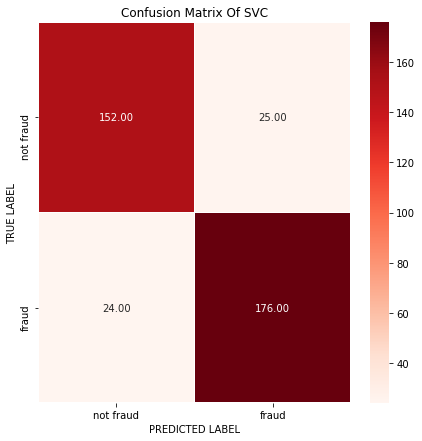

In [61]:
cm = confusion_matrix(y_test,svc_pred)

x_axis_labels=['not fraud','fraud']
y_axis_labels=['not fraud','fraud']

ax=plt.subplots(figsize=(7,7))
sns.heatmap(cm,annot=True,linewidths=0.1,fmt='.2f',cmap='Reds',xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel('PREDICTED LABEL')
plt.ylabel('TRUE LABEL')
plt.title('Confusion Matrix Of SVC')

In [62]:
#ROC_AUC Score of SVC:
roc_auc_score(y_test,svc.predict(x_test))

0.8693785310734462

#### Observation: 

We have seen that Gradient Boosting Classifier has given the best accuracy of 88.59% out of 6 different models. 

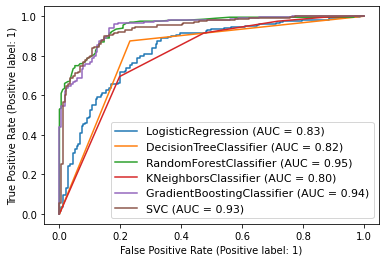

In [63]:

# Let's check ROC_AUC curve for fitted models:

disp = plot_roc_curve(lr,x_test,y_test)
plot_roc_curve(dt,x_test,y_test,ax=disp.ax_)
plot_roc_curve(rf,x_test,y_test,ax=disp.ax_)
plot_roc_curve(kn,x_test,y_test,ax=disp.ax_)
plot_roc_curve(gbdt_clf,x_test,y_test,ax=disp.ax_)
plot_roc_curve(svc,x_test,y_test,ax=disp.ax_)
plt.legend(prop={'size':11},loc='lower right')
plt.show()

- The AUC curve of Gradient Boosting Classifier and Random Forest Classifier has covered 95% area under the curve.

Now let's do evaluation of the models using cross validation:


####    Cross validation :

   Cross validation is widely used technique to evaluate the performance of Machine Learning Models. Cross Validation divides the data into parts, where one set is used for traning and other is used for testing purpose. And by applying CV, we can understand if our model is overfitting on training data or not.

In [64]:
# Checking Cross Validation score for Logistic Regression:
print(f" CV Score of LR:{cross_val_score(lr,x,y,cv=5).mean()*100:.2f}%")

 CV Score of LR:57.70%


In [65]:
# Checking Cross Validation score of Decision Tree Classifier:
print(f"CV Score of DT:{cross_val_score(dt,x,y,cv=5).mean()*100:.2f}%")

CV Score of DT:80.95%


In [66]:
# Checking Cross Validation of Random Forest Classifier:
print(f"CV Score of RF:{cross_val_score(rf,x,y,cv=5).mean()*100:.2f}%")

CV Score of RF:85.60%


In [67]:
# Checking Cross Validation Score of KNN:
print(f"CV Score of KNN:{cross_val_score(kn,x,y,cv=5).mean()*100:.2f}%")

CV Score of KNN:69.32%


In [68]:
#Checking Cross Validation Score of Gradient Boosting Classifier:
print(f"CV Score of Gradient Boosting Classifier:{cross_val_score(gbdt_clf,x,y,cv=5).mean()*100:.2f}%")

CV Score of Gradient Boosting Classifier:86.93%


In [69]:
#Checking Cross Validation Score of SVC:
print(f"CV Score of SVC:{cross_val_score(svc,x,y,cv=5).mean()*100:.2f}%")

CV Score of SVC:60.29%


Now let's check the difference between Accuracy Score and Cross Validation Score to select the best model from the 5 models:

- Diffrence betwwwn Accuracy score and Cross Validation Score of 5 different models :
- LR = 76.39-57.30 = 19.09 
- DT = 82.49-80.95 = 1.54 
- Rf = 86.47-85.60 = 0.87 
- KNN = 64.99-69.32 = -4.33
- Gbdt_clf = 87.27-86.93 = 0.34
- SVC = 87.00-60.29 = 27.71,


So, as the accuracy score of Gradient Boosting Classifier is 87% and  as the difference of Accuracy Score and CV of Gradient Boosting Classifier is least, it's the best Model. Let's do Hyperparameter Tuning of Gradient Boosting Classifier.

In [71]:
grid_param={
    "n_estimators":[12,13,15,17],
    "max_depth":range(4,12,2),
    "learning_rate":np.arange(0.1,1,0.1),
    "min_samples_split":range(4,8,2),
    "max_features":['auto', 'sqrt','log2']}

grid = GridSearchCV(gbdt_clf,param_grid = grid_param)
grid.fit(x_train,y_train)
grid.best_params_

{'learning_rate': 0.8,
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_split': 6,
 'n_estimators': 17}

In [76]:
gbdt_clf = GradientBoostingClassifier(max_depth=10,min_samples_split=6,learning_rate=0.8,max_features ='auto',n_estimators=17)
gbdt_clf.fit(x_train,y_train)
pred=gbdt_clf.predict(x_train)
gbdt_clf_report = pd.DataFrame(classification_report(y_train,pred,output_dict=True))
print("\n=======================Train Result===========================")
print(f"Accuracy score:{accuracy_score(y_train,pred)*100:.2f}%")
print("_______________________________________________________________")
print(f"CLASSIFICATION REPORT:\n{gbdt_clf_report}")
print("________________________________________________________________")
print(f" Confusion Matrix:\n{confusion_matrix(y_train,pred)}\n")
      
#####################TestScore##########################   
      
pred=gbdt_clf.predict(x_test)
clf_report = pd.DataFrame(classification_report(y_test,pred,output_dict=True))
print("\n=======================Test Result===========================")
print(f"Accuracy score:{accuracy_score(y_test,pred)*100:.2f}%")
print("_______________________________________________________________")
print(f"CLASSIFICATION REPORT:\n{clf_report}")
print("________________________________________________________________")
print(f" Confusion Matrix:\n{confusion_matrix(y_test,pred)}\n")      
      


=======================Train Result===========================
Accuracy score:100.00%
_______________________________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    576.0  553.0       1.0     1129.0        1129.0
________________________________________________________________
 Confusion Matrix:
[[576   0]
 [  0 553]]


=======================Test Result===========================
Accuracy score:88.86%
_______________________________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.904192    0.876190  0.888594    0.890191      0.889337
recall       0.853107    0.920000  0.888594    0.886554      0.888594
f1-score     0.877907    0.897561  0.8885

#### Observation:

After tuning with best parameters of Gradient Boosting Classifier,we have got best accuracy of 88.86%.

Let's check the classification report for that.

In [78]:
Report = classification_report(y_test,pred)
print(Report)

              precision    recall  f1-score   support

           0       0.90      0.85      0.88       177
           1       0.88      0.92      0.90       200

    accuracy                           0.89       377
   macro avg       0.89      0.89      0.89       377
weighted avg       0.89      0.89      0.89       377



- Classification report is showing  the Precision for not fraud is 90% and for fraud its 88%, recall is showing 85% for not fraud and 92% for fraud ,f1-score for not fraud is 88 and for fraud is 90.

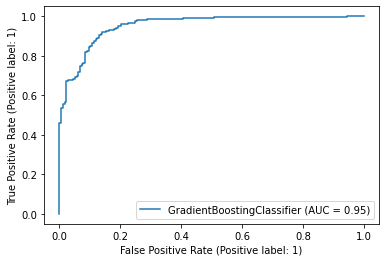

In [79]:
disp = plot_roc_curve(gbdt_clf,x_test,y_test)

- The AUC curve of Gradient Boosting Classifier is coving 95% area under the curve.

In [80]:
# model prediction using RF
x_predict = list(gbdt_clf.predict(x_test))
gbdt_clf_insu = {'predicted_values':x_predict,'orignal_values':y_test}
print(pd.DataFrame(gbdt_clf_insu))

      predicted_values  orignal_values
578                  0               0
1145                 1               1
382                  0               1
583                  0               0
966                  0               0
...                ...             ...
48                   0               0
1120                 1               1
155                  1               1
1252                 1               1
1146                 1               1

[377 rows x 2 columns]


In [81]:
#import joblib
import joblib

joblib.dump(gbdt_clf,'gbdt_insur_file.obj')

# SAVING THE MODEL

['gbdt_insur_file.obj']

In [82]:
gbdt_from_joblib=joblib.load('gbdt_insur_file.obj')
gbdt_from_joblib.predict(x_test)

#TESTING THE SAVED MODEL

array([0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,

#### Conclusion: 
Insurance companies are those organizations where a person can insure his health or anything that precious to him. Now by taking yearly or monthly premiums, these insurance companies give that customer the requied protection againt any kind of accident or any incident that affect the person's life. But as insurance company deal with premiums (money), there are times that the claims can be fradulent. To understand which one is a genuine claim and which one is fradulent, we need to analyze the various aspects and this provided dataset is all about that. Some of the analysis are as follows,

- Customer with higher age, the fraud report on the claims reduce.
- Fraud report is highiest in Chess of all the insured hobbies.
- Nissan has got the highest non-fraud reports.
- In case of Single Vehicle Collision and Multi-vehicle Collision the vehicle claim amount is more.
- Arlington city has got the highest fraud report as incident city.

After analyzing the various features we have made 6 different models. Out of which Gradient Boosting Classifier has given the best accuracy of 88% .